In [18]:
import os
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import xarray as xr

from mapper_functions import plot_global_contour

from my_functions import read_obsfcstana
from my_functions import read_obsfcstana_extend_datetime

In [ ]:
# Produce with extended date_time
# Define the list of years
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021']

# Define the common file name start
file_name_start = 'smap_ascat_multivariate_test.ens_avg.ldas_ObsFcstAna.20'

# Define the print flag
printflag = False

# Loop over the years
for i in range(len(years)-1):
    # Define the current and next year
    current_year = years[i]
    next_year = years[i+1]
    # Define the list of paths
    paths = []
    for month in range(4, 13):
        path = f'/discover/nobackup/amfox/Experiments/smap_ascat_multivariate_test/smap_ascat_multivariate_test/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y{current_year}/M{month:02d}'
        paths.append(path)

    for month in range(1, 4):
        path = f'/discover/nobackup/amfox/Experiments/smap_ascat_multivariate_test/smap_ascat_multivariate_test/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y{next_year}/M{month:02d}'
        paths.append(path)
    
    # Initialize lists to store the returned values
    date_times = []
    obs_species_list = []
    obs_tilenum_list = []
    obs_lon_list = []
    obs_lat_list = []
    obs_obs_list = []
    obs_fcst_list = []
    obs_ana_list = []
    
    # Loop over the paths for the current year
    for path in paths:
        # Print the current path
        print("Current path:", path)

        # Call the read_obsfcstana function for the current path
        date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana_extend_datetime(path, file_name_start, printflag)
        
        # Append the returned values to the lists
        date_times.append(date_time)
        obs_species_list.append(obs_species)
        obs_tilenum_list.append(obs_tilenum)
        obs_lon_list.append(obs_lon)
        obs_lat_list.append(obs_lat)
        obs_obs_list.append(obs_obs)
        obs_fcst_list.append(obs_fcst)
        obs_ana_list.append(obs_ana)
    
    # Combine the returned values from all paths
    date_time_out = np.concatenate(date_times)
    obs_species_out = np.concatenate(obs_species_list)
    obs_tilenum_out = np.concatenate(obs_tilenum_list)
    obs_lon_out = np.concatenate(obs_lon_list)
    obs_lat_out = np.concatenate(obs_lat_list)
    obs_obs_out = np.concatenate(obs_obs_list)
    obs_fcst_out = np.concatenate(obs_fcst_list)
    obs_ana_out = np.concatenate(obs_ana_list)
    
    # Save the returned values to a file including the current year in the file name
    np.savez(f'smap_ascat_multivariate_test_obsfcstana_extend_datetime_{current_year}.npz', date_time=date_time_out, obs_species=obs_species_out, obs_tilenum=obs_tilenum_out, obs_lon=obs_lon_out, obs_lat=obs_lat_out, obs_obs=obs_obs_out, obs_fcst=obs_fcst_out, obs_ana=obs_ana_out)

In [ ]:
# Directory path to search for NetCDF files
root_directory = '/discover/nobackup/amfox/Experiments/smap_ascat_multivariate_test/smap_ascat_multivariate_test/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2015/'

# Initialize an empty list to store the calculated sfmc_increment values
sfmc_increment_list = []
rzmc_increment_list = []

time_stamp_list = []

# Recursively traverse the directory tree
for root, dirs, files in sorted(os.walk(root_directory)):
    for filename in sorted(files):
        if filename.endswith('.nc4') and not filename.endswith('z.nc4') and filename.startswith('smap_ascat_multivariate_test.inst3_1d_lndfcstana_Nt.2'):
            # Construct the full file path
            file_path = os.path.join(root, filename)
            print(file_path)
            
            # Open the NetCDF file using xarray
            ds = xr.open_dataset(file_path)           

            # Extract time_stamp
            time_stamp = ds['time_stamp']
            
            time_stamp_list.append(time_stamp)
            
            # Extract the SFMC_ANA and SFMC_FCST variables
            sfmc_ana = ds['SFMC_ANA']
            sfmc_fcst = ds['SFMC_FCST']
            rzmc_ana = ds['RZMC_ANA']
            rzmc_fcst = ds['RZMC_FCST']
            
            # Calculate the sfmc_increment
            sfmc_increment = sfmc_ana - sfmc_fcst
            rzmc_increment = rzmc_ana - rzmc_fcst
            
            # Append the sfmc_increment values to the list
            sfmc_increment_list.append(sfmc_increment)
            rzmc_increment_list.append(rzmc_increment)
            
            # Close the NetCDF file
            ds.close()

# Concatenate the sfmc_increment values along the time dimension
sfmc_increment_concat = xr.concat(sfmc_increment_list, dim='time')
rzmc_increment_concat = xr.concat(rzmc_increment_list, dim='time')

time_stamp_concat = xr.concat(time_stamp_list, dim='time')

# Save both the concatenated sfmc_increment and rzmc_increment values to a new npsavez file
np.savez('smap_ascat_multivariate_test_increments.npz', time_stamp=time_stamp_concat, sfmc_increment=sfmc_increment_concat, rzmc_increment=rzmc_increment_concat)

In [2]:
# Open each of the saved files
# data_2015 = np.load('../test_data/AMS_24/increment_time_series_analyzer/smap_ascat_multivariate_test_obsfcstana_extend_datetime_2015.npz', allow_pickle=True)
# data_2016 = np.load('../test_data/AMS_24/increment_time_series_analyzer/smap_ascat_multivariate_test_obsfcstana_extend_datetime_2016.npz', allow_pickle=True)
# data_2017 = np.load('../test_data/AMS_24/increment_time_series_analyzer/smap_ascat_multivariate_test_obsfcstana_extend_datetime_2017.npz', allow_pickle=True)
# data_2018 = np.load('../test_data/AMS_24/increment_time_series_analyzer/smap_ascat_multivariate_test_obsfcstana_extend_datetime_2018.npz', allow_pickle=True)
# data_2019 = np.load('../test_data/AMS_24/increment_time_series_analyzer/smap_ascat_multivariate_test_obsfcstana_extend_datetime_2019.npz', allow_pickle=True)
data_2020 = np.load('../test_data/AMS_24/increment_time_series_analyzer/smap_ascat_multivariate_test_obsfcstana_extend_datetime_2020.npz', allow_pickle=True)

In [ ]:
date_time = data_2015['date_time']
obs_species = data_2015['obs_species']
obs_tilenum = data_2015['obs_tilenum']
obs_lon = data_2015['obs_lon']
obs_lat = data_2015['obs_lat']
obs_obs = data_2015['obs_obs']
obs_fcst = data_2015['obs_fcst']
obs_ana = data_2015['obs_ana']

In [3]:
date_time = data_2020['date_time']
obs_species = data_2020['obs_species']
obs_tilenum = data_2020['obs_tilenum']
obs_lon = data_2020['obs_lon']
obs_lat = data_2020['obs_lat']
obs_obs = data_2020['obs_obs']
obs_fcst = data_2020['obs_fcst']
obs_ana = data_2020['obs_ana']

In [ ]:
# Extract and combine the data from each of the files
date_time = np.concatenate((data_2015['date_time'], data_2016['date_time'], data_2017['date_time'], data_2018['date_time'], data_2019['date_time'], data_2020['date_time']))
obs_species = np.concatenate((data_2015['obs_species'], data_2016['obs_species'], data_2017['obs_species'], data_2018['obs_species'], data_2019['obs_species'], data_2020['obs_species']))
obs_tilenum = np.concatenate((data_2015['obs_tilenum'], data_2016['obs_tilenum'], data_2017['obs_tilenum'], data_2018['obs_tilenum'], data_2019['obs_tilenum'], data_2020['obs_tilenum']))
# obs_lon = np.concatenate((data_2015['obs_lon'], data_2016['obs_lon'], data_2017['obs_lon'], data_2018['obs_lon'], data_2019['obs_lon'], data_2020['obs_lon']))
# obs_lat = np.concatenate((data_2015['obs_lat'], data_2016['obs_lat'], data_2017['obs_lat'], data_2018['obs_lat'], data_2019['obs_lat'], data_2020['obs_lat']))
obs_obs = np.concatenate((data_2015['obs_obs'], data_2016['obs_obs'], data_2017['obs_obs'], data_2018['obs_obs'], data_2019['obs_obs'], data_2020['obs_obs']))
obs_fcst = np.concatenate((data_2015['obs_fcst'], data_2016['obs_fcst'], data_2017['obs_fcst'], data_2018['obs_fcst'], data_2019['obs_fcst'], data_2020['obs_fcst']))
obs_ana = np.concatenate((data_2015['obs_ana'], data_2016['obs_ana'], data_2017['obs_ana'], data_2018['obs_ana'], data_2019['obs_ana'], data_2020['obs_ana']))

In [4]:
# Calculate obs minus fcst
obs_minus_fcst = []
for i in range(len(obs_obs)):
    obs_minus_fcst_chunk = obs_obs[i] - obs_fcst[i]
    obs_minus_fcst.append(obs_minus_fcst_chunk)

In [5]:
# Calculate obs minus ana
obs_minus_ana = []
for i in range(len(obs_obs)):
    obs_minus_ana_chunk = obs_obs[i] - obs_ana[i]
    obs_minus_ana.append(obs_minus_ana_chunk)

In [6]:
# Calculate obs increment
obs_inc = []
for i in range(len(obs_obs)):
    obs_inc_chunk = obs_ana[i] - obs_fcst[i]
    obs_inc.append(obs_inc_chunk)

In [7]:
# Convert the lists to numpy arrays
obs_minus_fcst = np.array(obs_minus_fcst)
obs_minus_ana = np.array(obs_minus_ana)
obs_inc = np.array(obs_inc)

In [8]:
# Find unique tilenum values
unique_tilenum = np.unique(obs_tilenum)

# Find the number of unique tilenum values
num_unique_tilenum = len(unique_tilenum)

# Print the number of unique tilenum values
print(f"Number of unique tilenum values: {num_unique_tilenum}")

Number of unique tilenum values: 96664


In [9]:
# Sort the arrays based on obs_tilenum
sort_indices = np.argsort(obs_tilenum)

sorted_date_time = date_time[sort_indices]
sorted_obs_tilenum = obs_tilenum[sort_indices]
sorted_obs_species = obs_species[sort_indices]
sorted_obs_obs = obs_obs[sort_indices]
sorted_obs_fcst = obs_fcst[sort_indices]
sorted_obs_ana = obs_ana[sort_indices]
sorted_obs_minus_fcst = obs_minus_fcst[sort_indices]
sorted_obs_minus_ana = obs_minus_ana[sort_indices]
sorted_obs_inc = obs_inc[sort_indices]


In [10]:


# Find the unique tilenum values and their counts
unique_tilenum, counts = np.unique(sorted_obs_tilenum, return_counts=True)

# Calculate the indices where the groups should be split
split_indices = np.cumsum(counts)[:-1]


In [11]:

# Split the sorted arrays based on the split indices
date_time_grouped = np.split(sorted_date_time, split_indices)
obs_species_grouped = np.split(sorted_obs_species, split_indices)
obs_obs_grouped = np.split(sorted_obs_obs, split_indices)
obs_fcst_grouped = np.split(sorted_obs_fcst, split_indices)
obs_ana_grouped = np.split(sorted_obs_ana, split_indices)
obs_minus_fcst_grouped = np.split(sorted_obs_minus_fcst, split_indices)
obs_minus_ana_grouped = np.split(sorted_obs_minus_ana, split_indices)
obs_inc_grouped = np.split(sorted_obs_inc, split_indices)

In [ ]:
# Run this cell if you have a multi-sensor experiment

# Find the number of observations for each tilenum
num_obs_smap = []
num_obs_ascat = []
for i in range(num_unique_tilenum):
    num_obs_smap.append(len(obs_obs_grouped[i][obs_species_grouped[i] < 5]))
    num_obs_ascat.append(len(obs_obs_grouped[i][obs_species_grouped[i] > 4]))

#Calculate the mean of the observations for each tilenum
mean_obs_smap = []
mean_obs_ascat = []
for i in range(num_unique_tilenum):
    mean_obs_smap.append(np.mean(obs_obs_grouped[i][obs_species_grouped[i] < 5]))
    mean_obs_ascat.append(np.mean(obs_obs_grouped[i][obs_species_grouped[i] > 4]))

# Calculate the mean of the forecasts for each tilenum
mean_fcst_smap = []
mean_fcst_ascat = []
for i in range(num_unique_tilenum):
    mean_fcst_smap.append(np.mean(obs_fcst_grouped[i][obs_species_grouped[i] < 5]))
    mean_fcst_ascat.append(np.mean(obs_fcst_grouped[i][obs_species_grouped[i] > 4]))

# Calculate the mean of the analyses for each tilenum
mean_ana_smap = []
mean_ana_ascat = []
for i in range(num_unique_tilenum):
    mean_ana_smap.append(np.mean(obs_ana_grouped[i][obs_species_grouped[i] < 5]))
    mean_ana_ascat.append(np.mean(obs_ana_grouped[i][obs_species_grouped[i] > 4]))

# Calculate the mean of the obs minus fcst for each tilenum
mean_obs_minus_fcst_smap = []
mean_obs_minus_fcst_ascat = []
for i in range(num_unique_tilenum):
    mean_obs_minus_fcst_smap.append(np.mean(obs_minus_fcst_grouped[i][obs_species_grouped[i] < 5]))
    mean_obs_minus_fcst_ascat.append(np.mean(obs_minus_fcst_grouped[i][obs_species_grouped[i] > 4]))

# Calculate the mean of the obs minus ana for each tilenum
mean_obs_minus_ana_smap = []
mean_obs_minus_ana_ascat = []
for i in range(num_unique_tilenum):
    mean_obs_minus_ana_smap.append(np.mean(obs_minus_ana_grouped[i][obs_species_grouped[i] < 5]))
    mean_obs_minus_ana_ascat.append(np.mean(obs_minus_ana_grouped[i][obs_species_grouped[i] > 4]))

# Calculate the standard deviation of the obs_minus_fcst for each tilenum
std_obs_minus_fcst_smap = []
std_obs_minus_fcst_ascat = []
for i in range(num_unique_tilenum):
    std_obs_minus_fcst_smap.append(np.std(obs_minus_fcst_grouped[i][obs_species_grouped[i] < 5]))
    std_obs_minus_fcst_ascat.append(np.std(obs_minus_fcst_grouped[i][obs_species_grouped[i] > 4]))

# Calculate the standard deviation of the obs_minus_ana for each tilenum
std_obs_minus_ana_smap = []
std_obs_minus_ana_ascat = []
for i in range(num_unique_tilenum):
    std_obs_minus_ana_smap.append(np.std(obs_minus_ana_grouped[i][obs_species_grouped[i] < 5]))
    std_obs_minus_ana_ascat.append(np.std(obs_minus_ana_grouped[i][obs_species_grouped[i] > 4]))

In [ ]:
# Specify the path to the netCDF file
file_path = '/discover/nobackup/amfox/Experiments/smap_ascat_multivariate_test/smap_ascat_multivariate_test/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2015/M04/smap_ascat_multivariate_test.inst3_1d_lndfcstana_Nt.20150411.nc4'
file_path = 'DAv7_M36.inst3_1d_lndfcstana_Nt.20150901.nc4'

# Open the netCDF file
dataset = xr.open_dataset(file_path)

# Extract the lon and lat variables
lon = dataset['lon']
lat = dataset['lat']

# Assign lon and lat to each tilenum
lon_tilenum = []
lat_tilenum = []
for i in range(num_unique_tilenum):
    lon_tilenum.append(lon[int(unique_tilenum[i])])
    lat_tilenum.append(lat[int(unique_tilenum[i])])

# Convert the lists to numpy arrays
lon_tilenum = np.array(lon_tilenum)
lat_tilenum = np.array(lat_tilenum)

In [ ]:
from mapper_functions import plot_global
    
obarray = np.empty([num_unique_tilenum, 3])
obarray[:, 1] = lon_tilenum
obarray[:, 2] = lat_tilenum
obarray[:, 0] = num_obs_ascat
    
plot_global(obarray,False,'Number of ASCAT Obs Assimilated','Total')

In [12]:
increments = np.load('../test_data/AMS_24/increment_time_series_analyzer/smap_ascat_multivariate_test_increments.npz', allow_pickle=True)  

time_stamp = increments['time_stamp']
sfmc_increment = increments['sfmc_increment']
rzmc_increment = increments['rzmc_increment']

date_time_i_list = []  # Create an empty list to store date_time_i values

for ts in time_stamp:
    ts_str = ts.decode('utf-8')  # Convert bytes to string

    # Parse the string to datetime format
    date_time_i = datetime.strptime(ts_str, '%Y%m%d_%H%Mz')

    date_time_i_list.append(date_time_i)  # Append date_time_i to the list

date_time_i = np.array(date_time_i_list)  # Convert the list to a numpy array

In [19]:
# Get core site information
import scipy.io as sio

matlab_file_path = '../test_data/SMAP/smap_ascat_multivariate_test_CalVal_M33_SM_3h__6yr_stats.mat'
mat_contents = sio.loadmat(matlab_file_path)

INSITU_id = mat_contents['INSITU_id']
id_list = INSITU_id[0].tolist()
id_list = [str(id[0]) for id in id_list]

INSITU_lat = mat_contents['INSITU_lat']
INSITU_lon = mat_contents['INSITU_lon']
ind_tile = mat_contents['ind_tile']

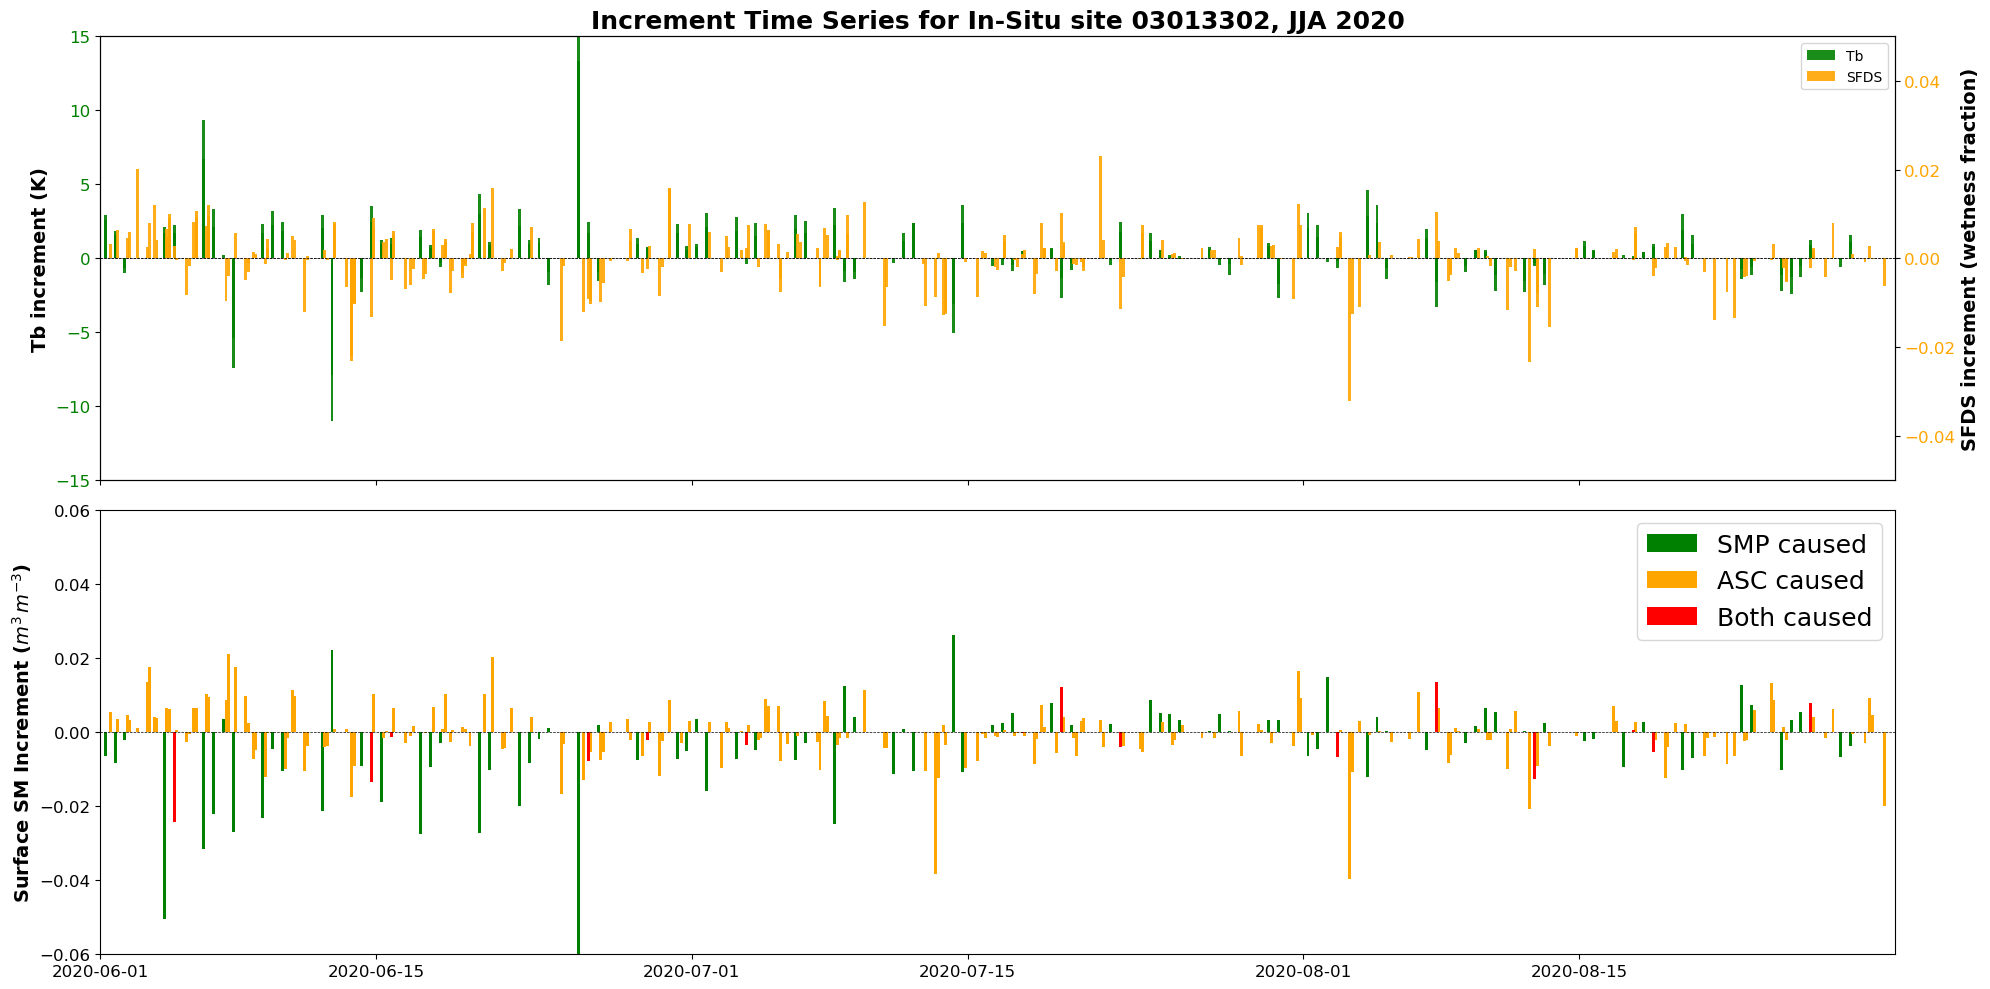

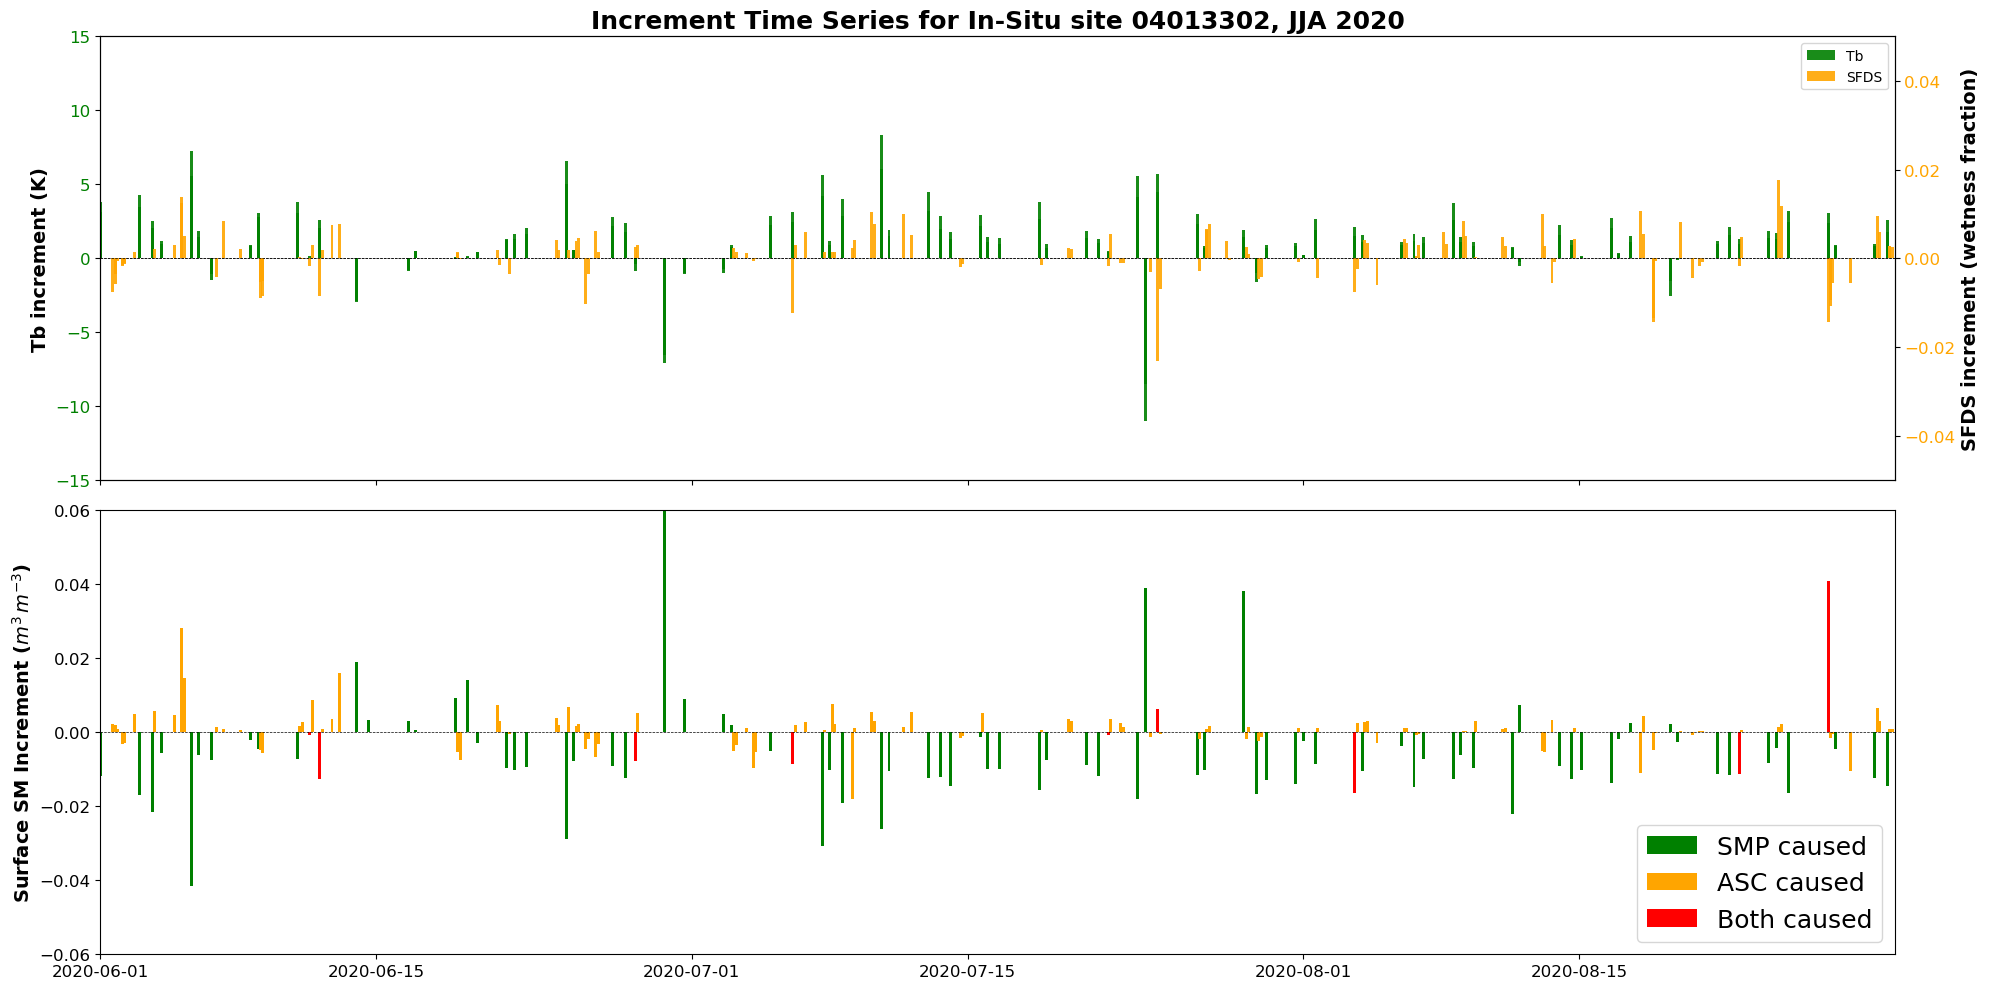

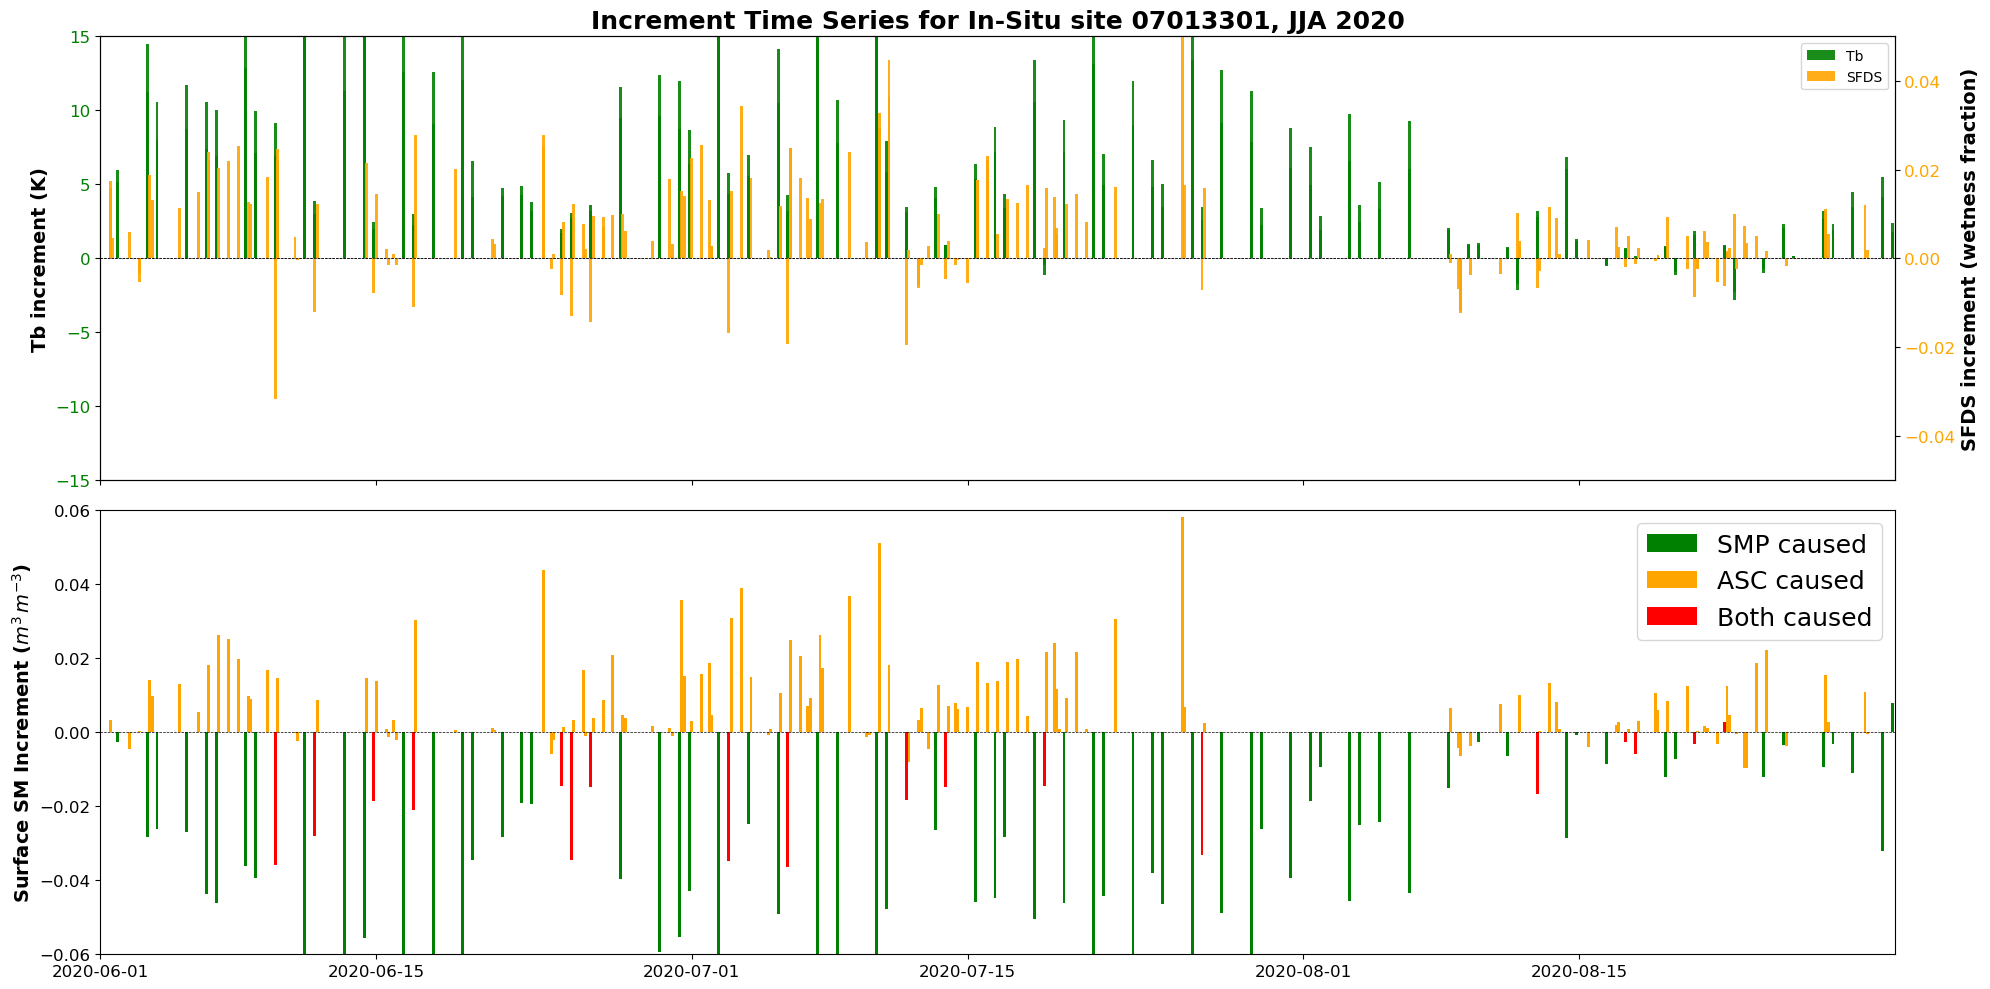

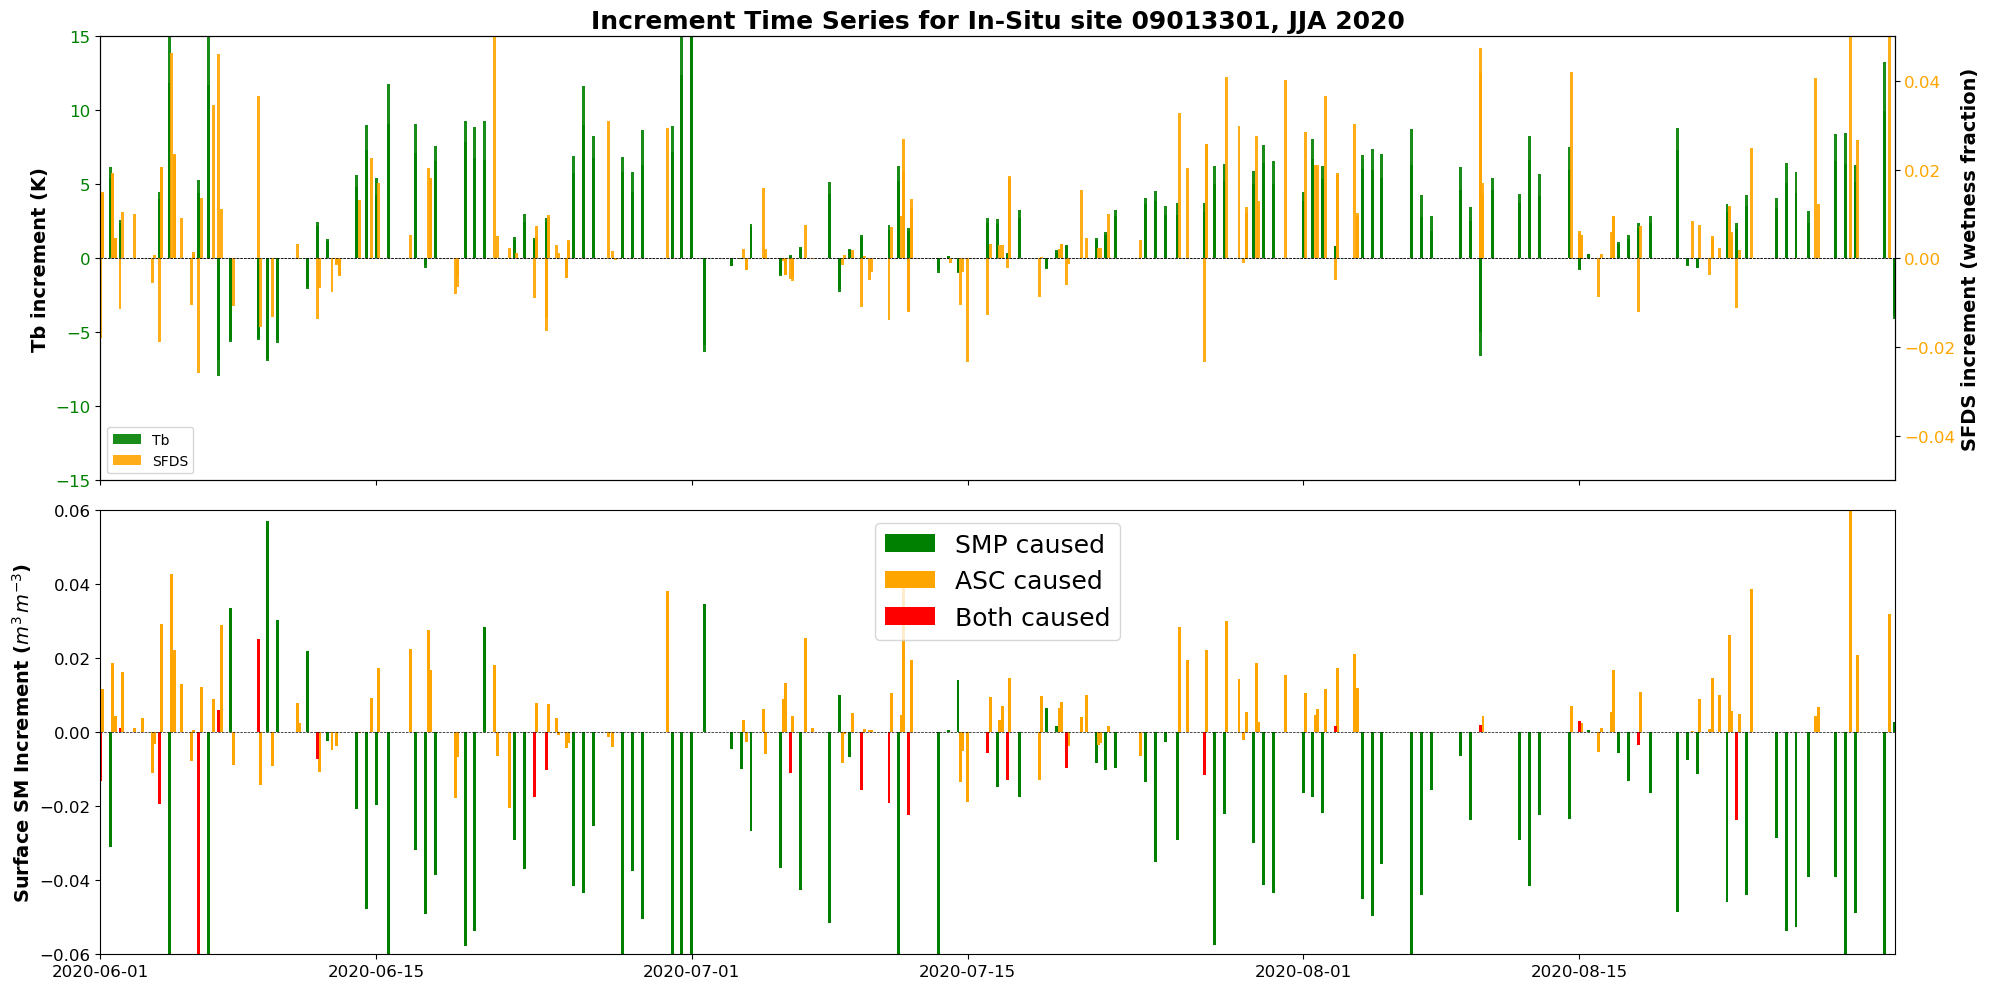

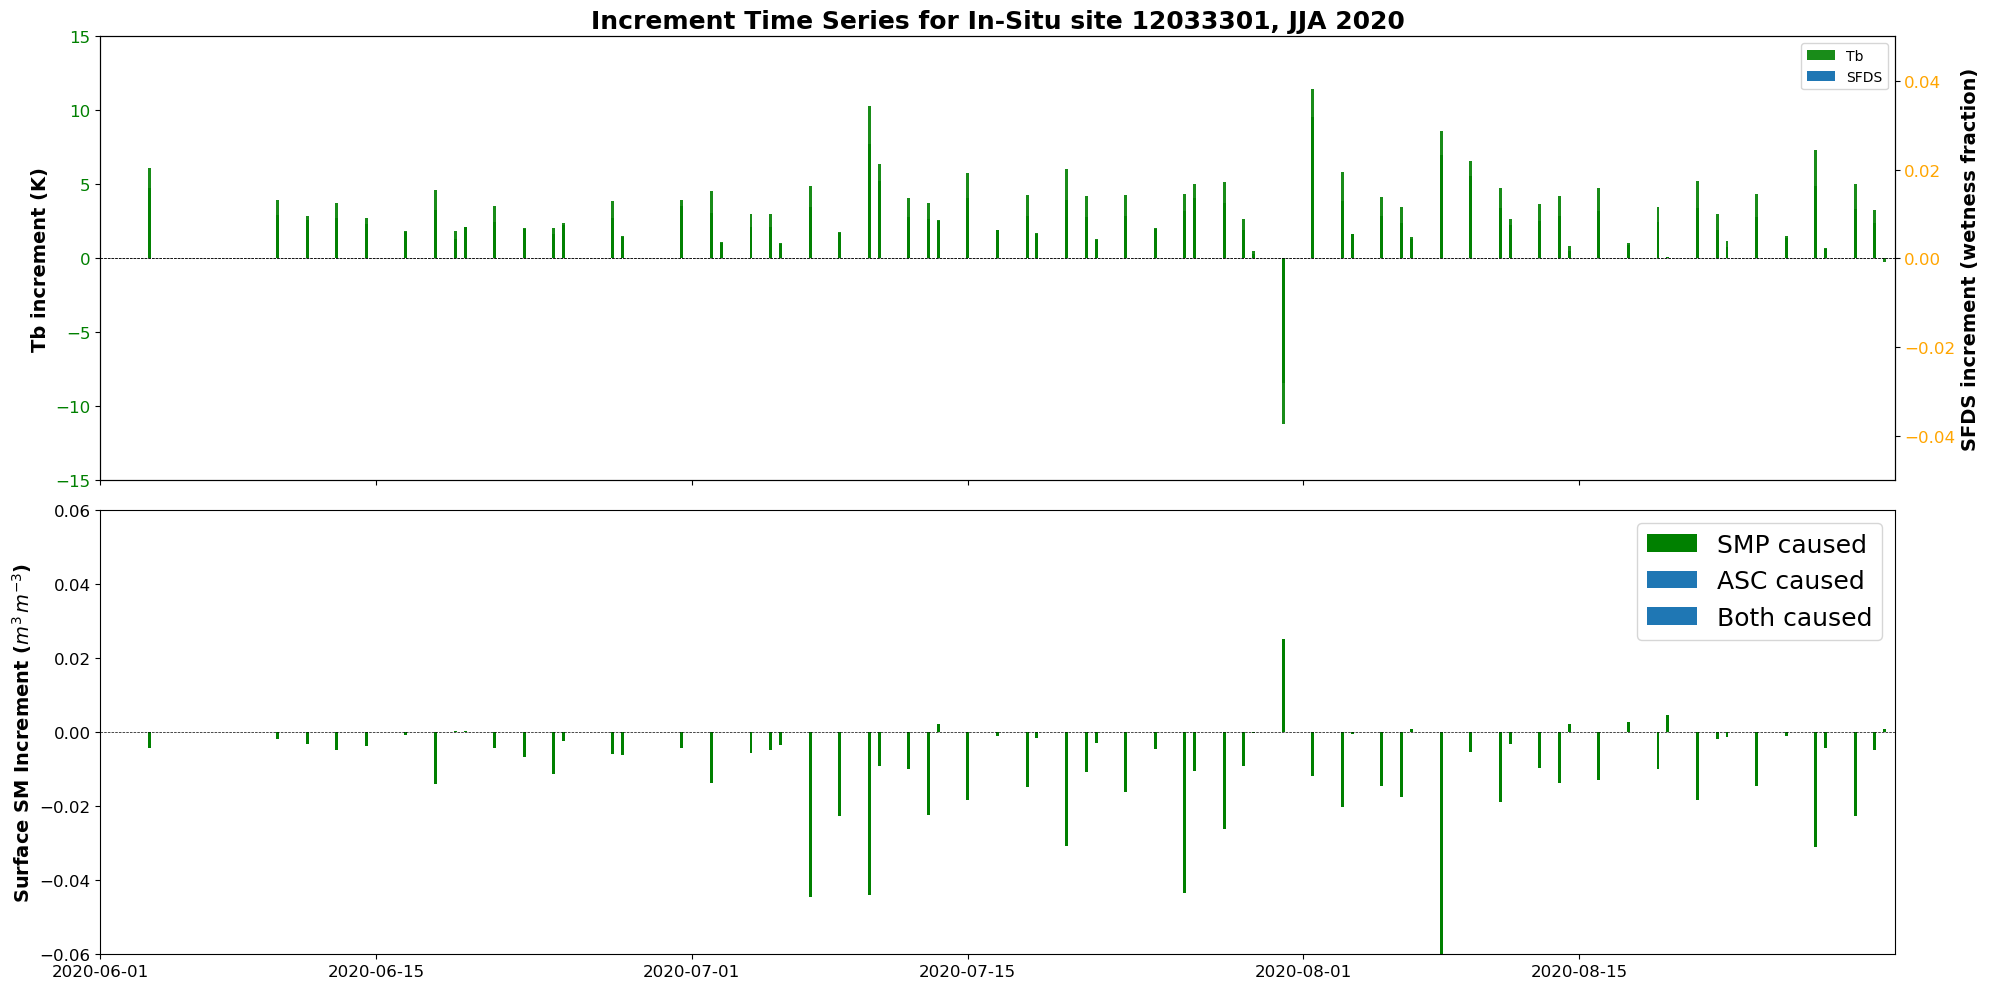

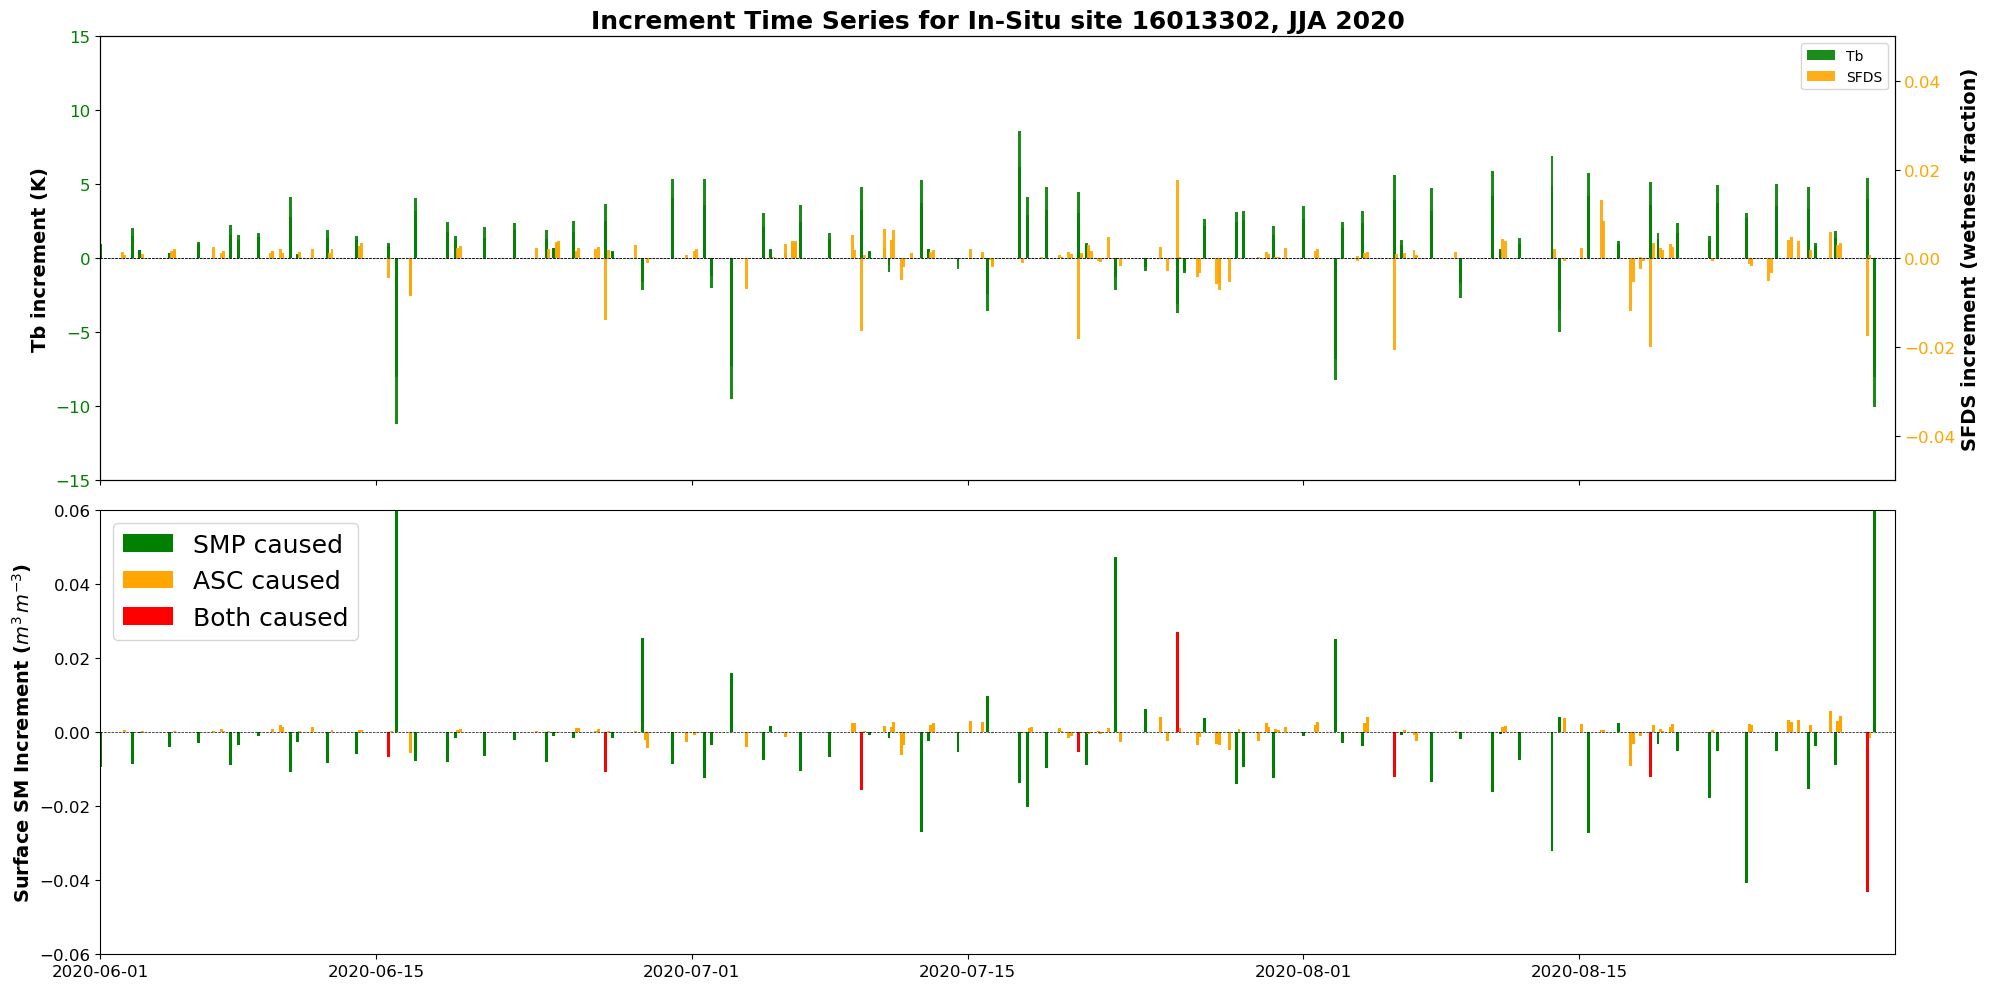

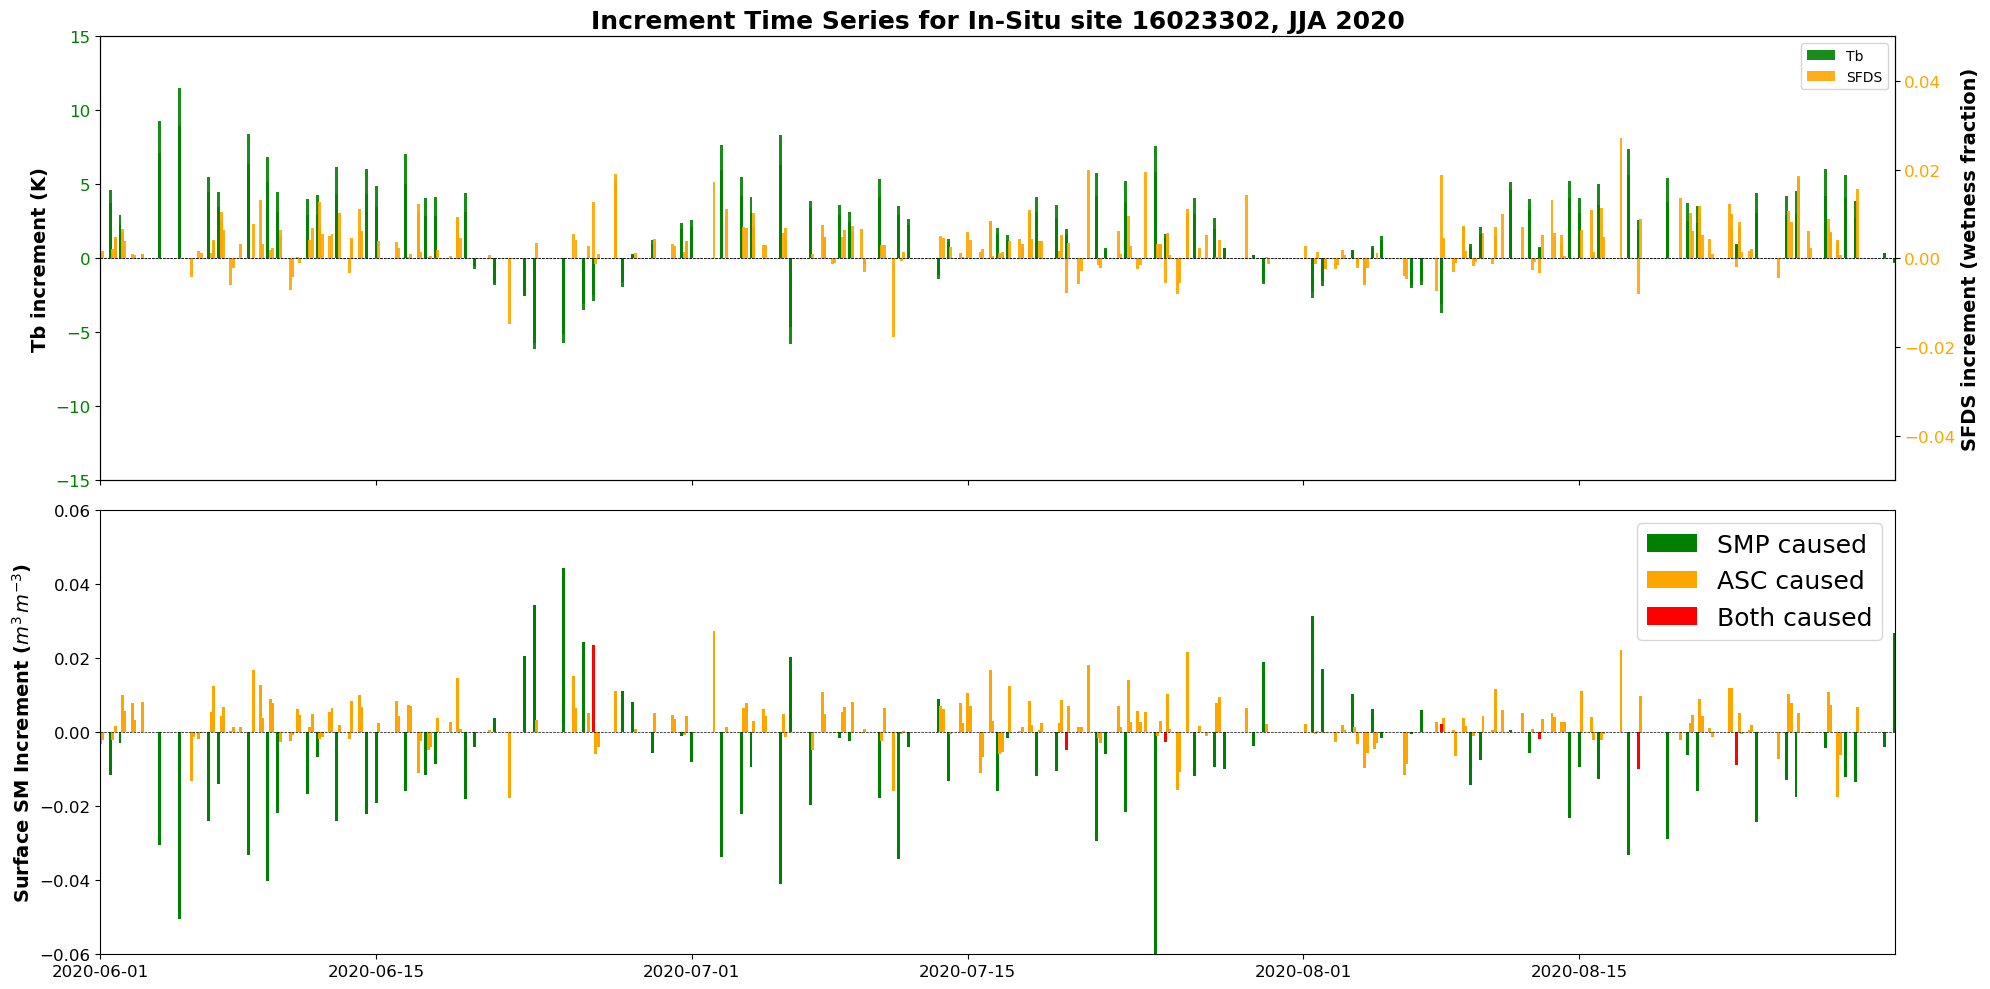

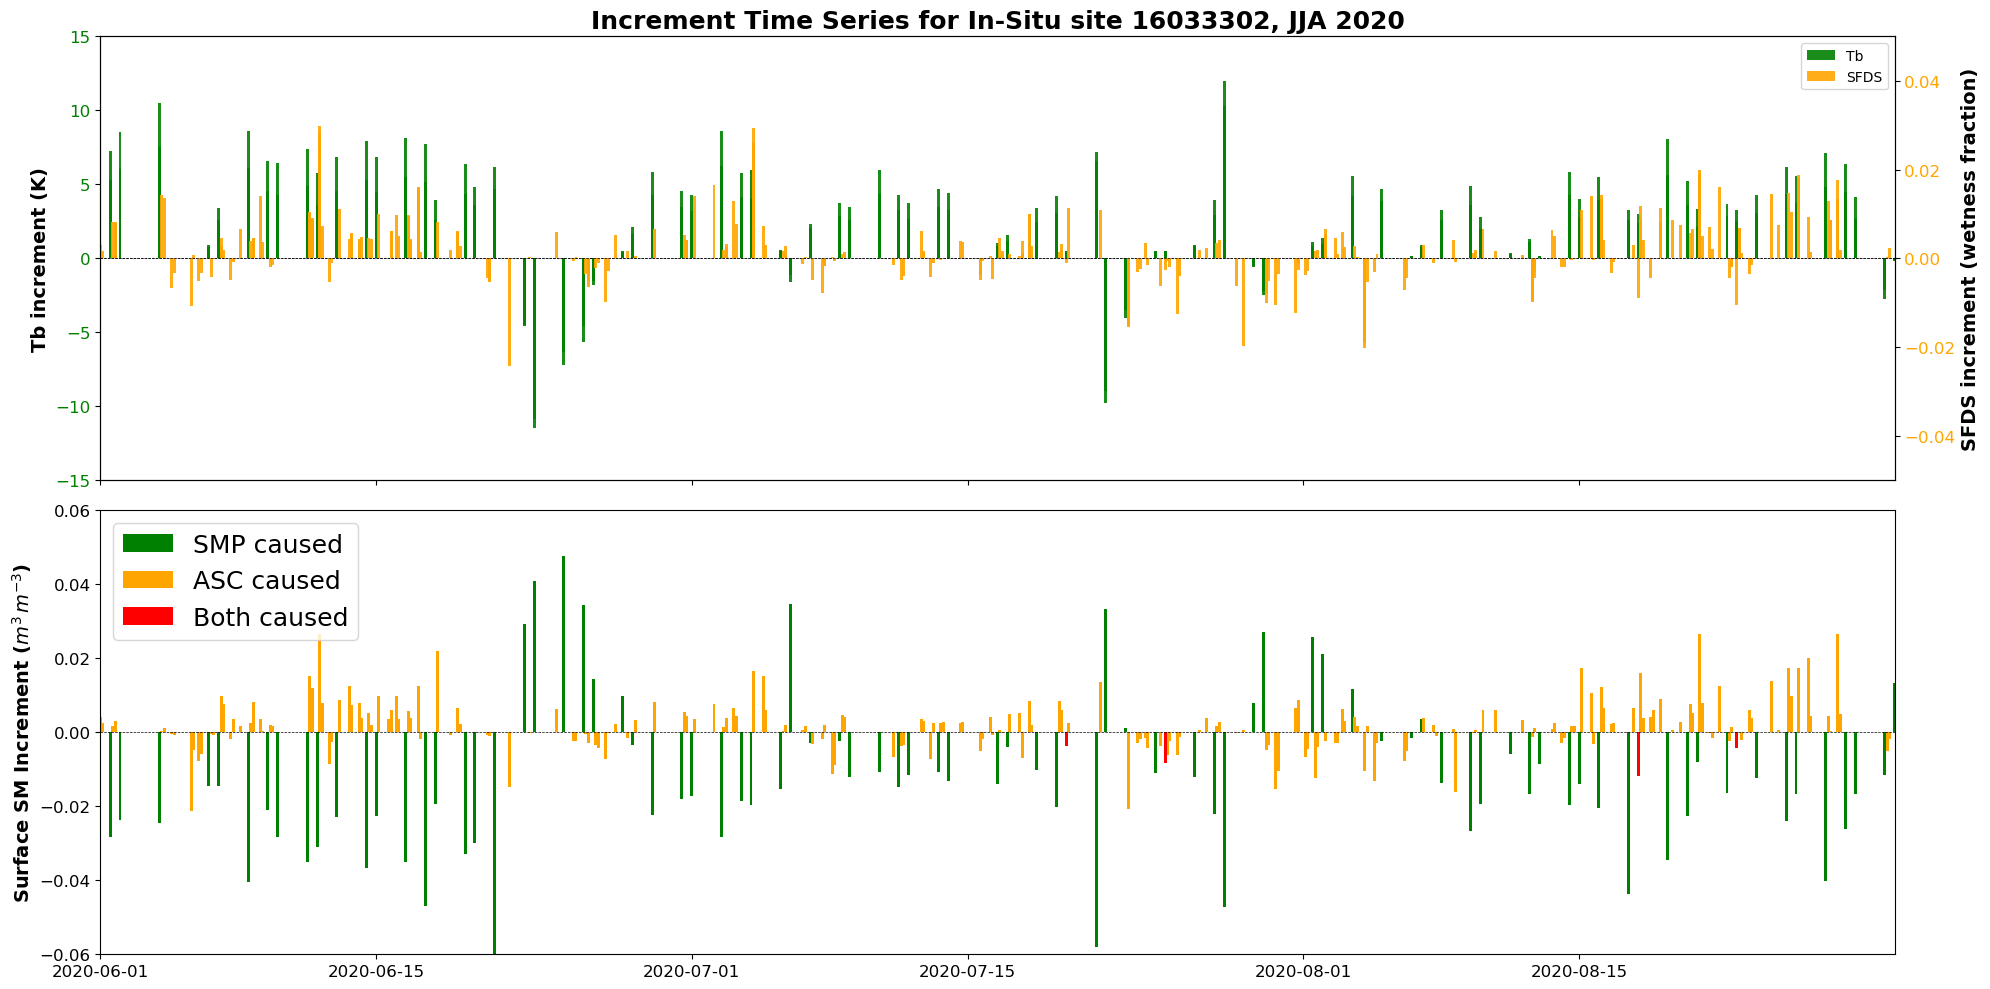

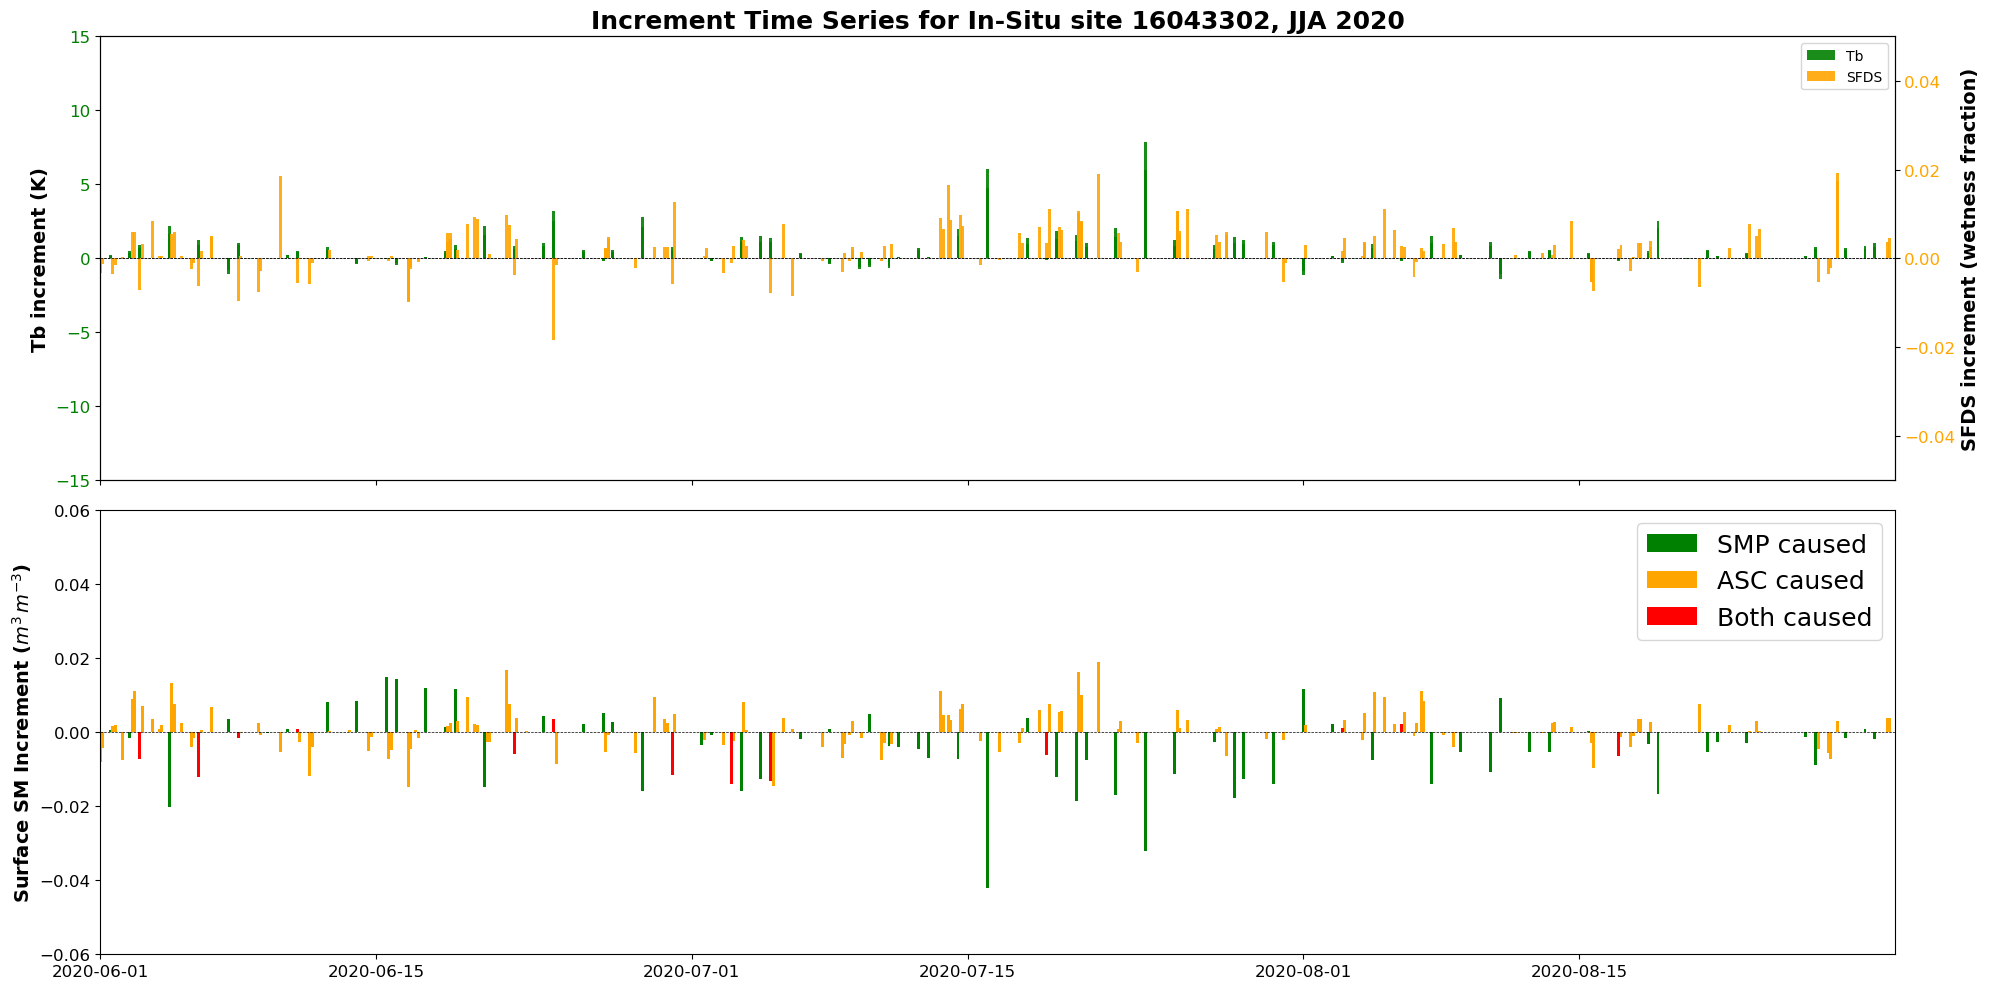

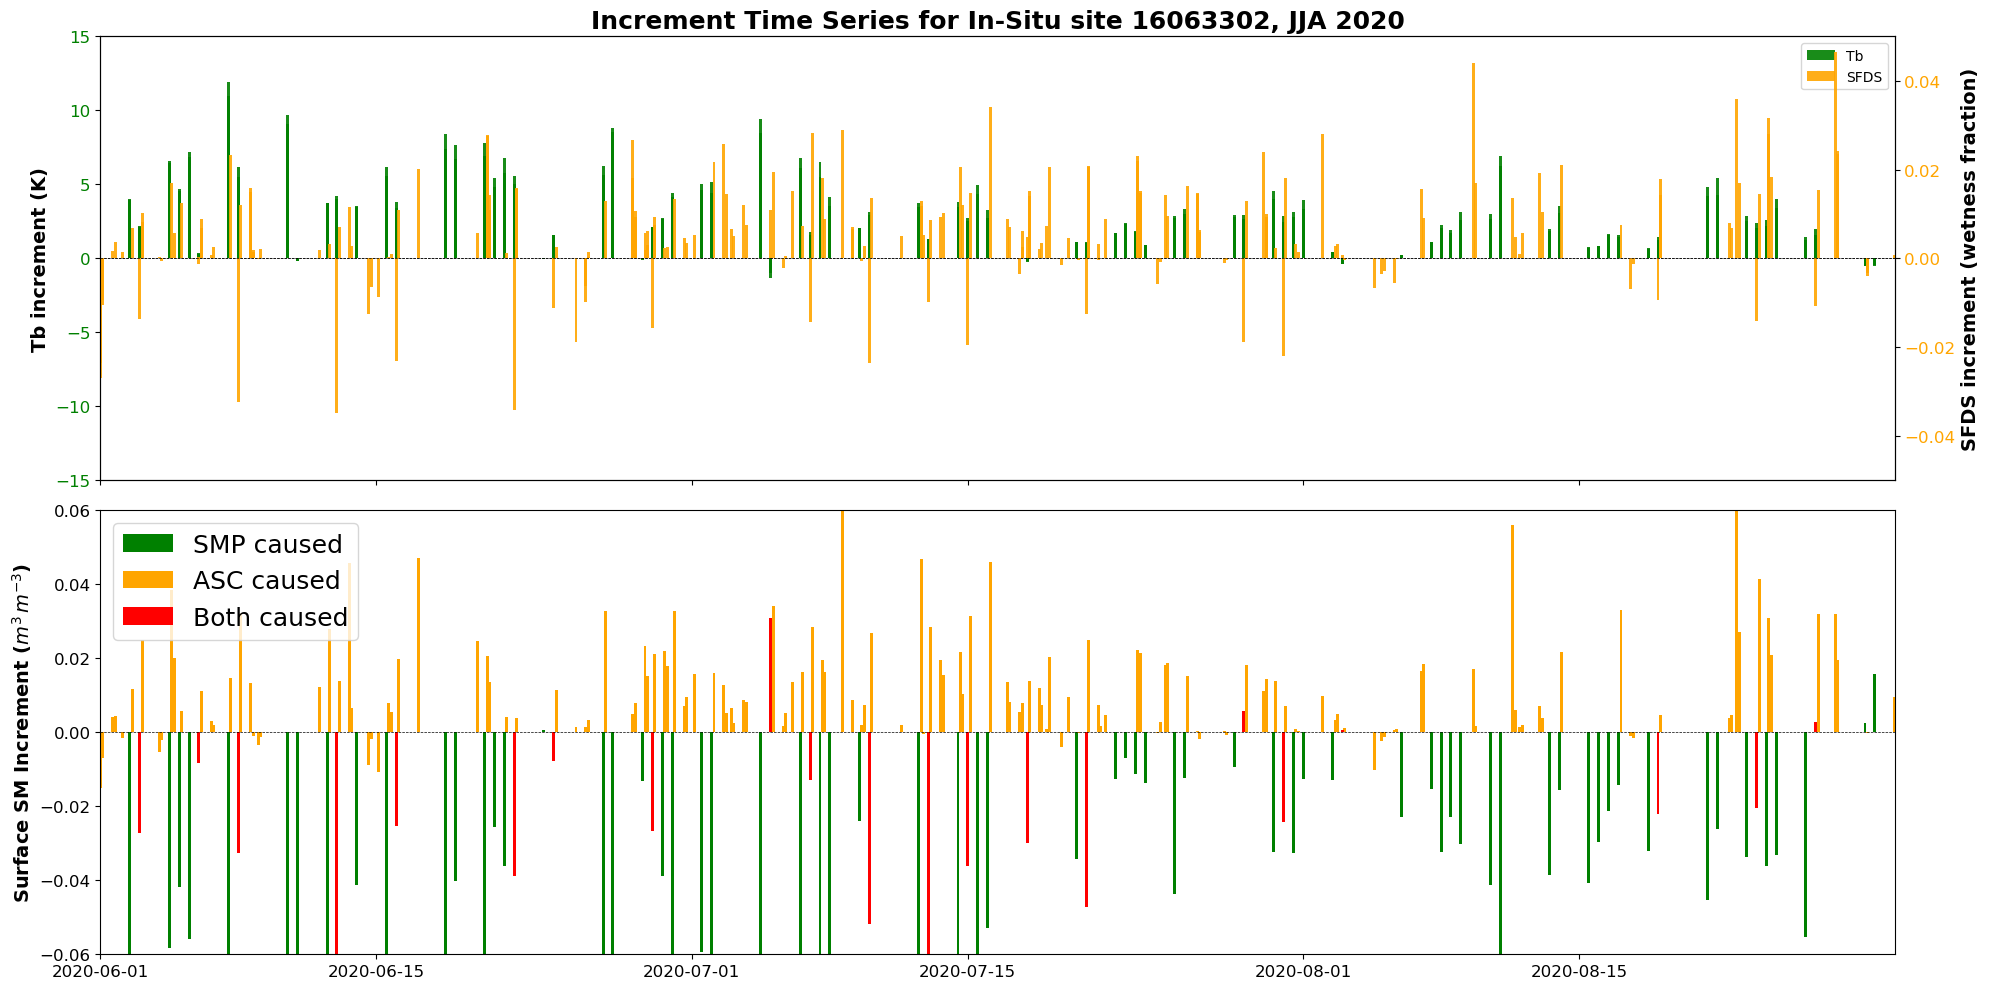

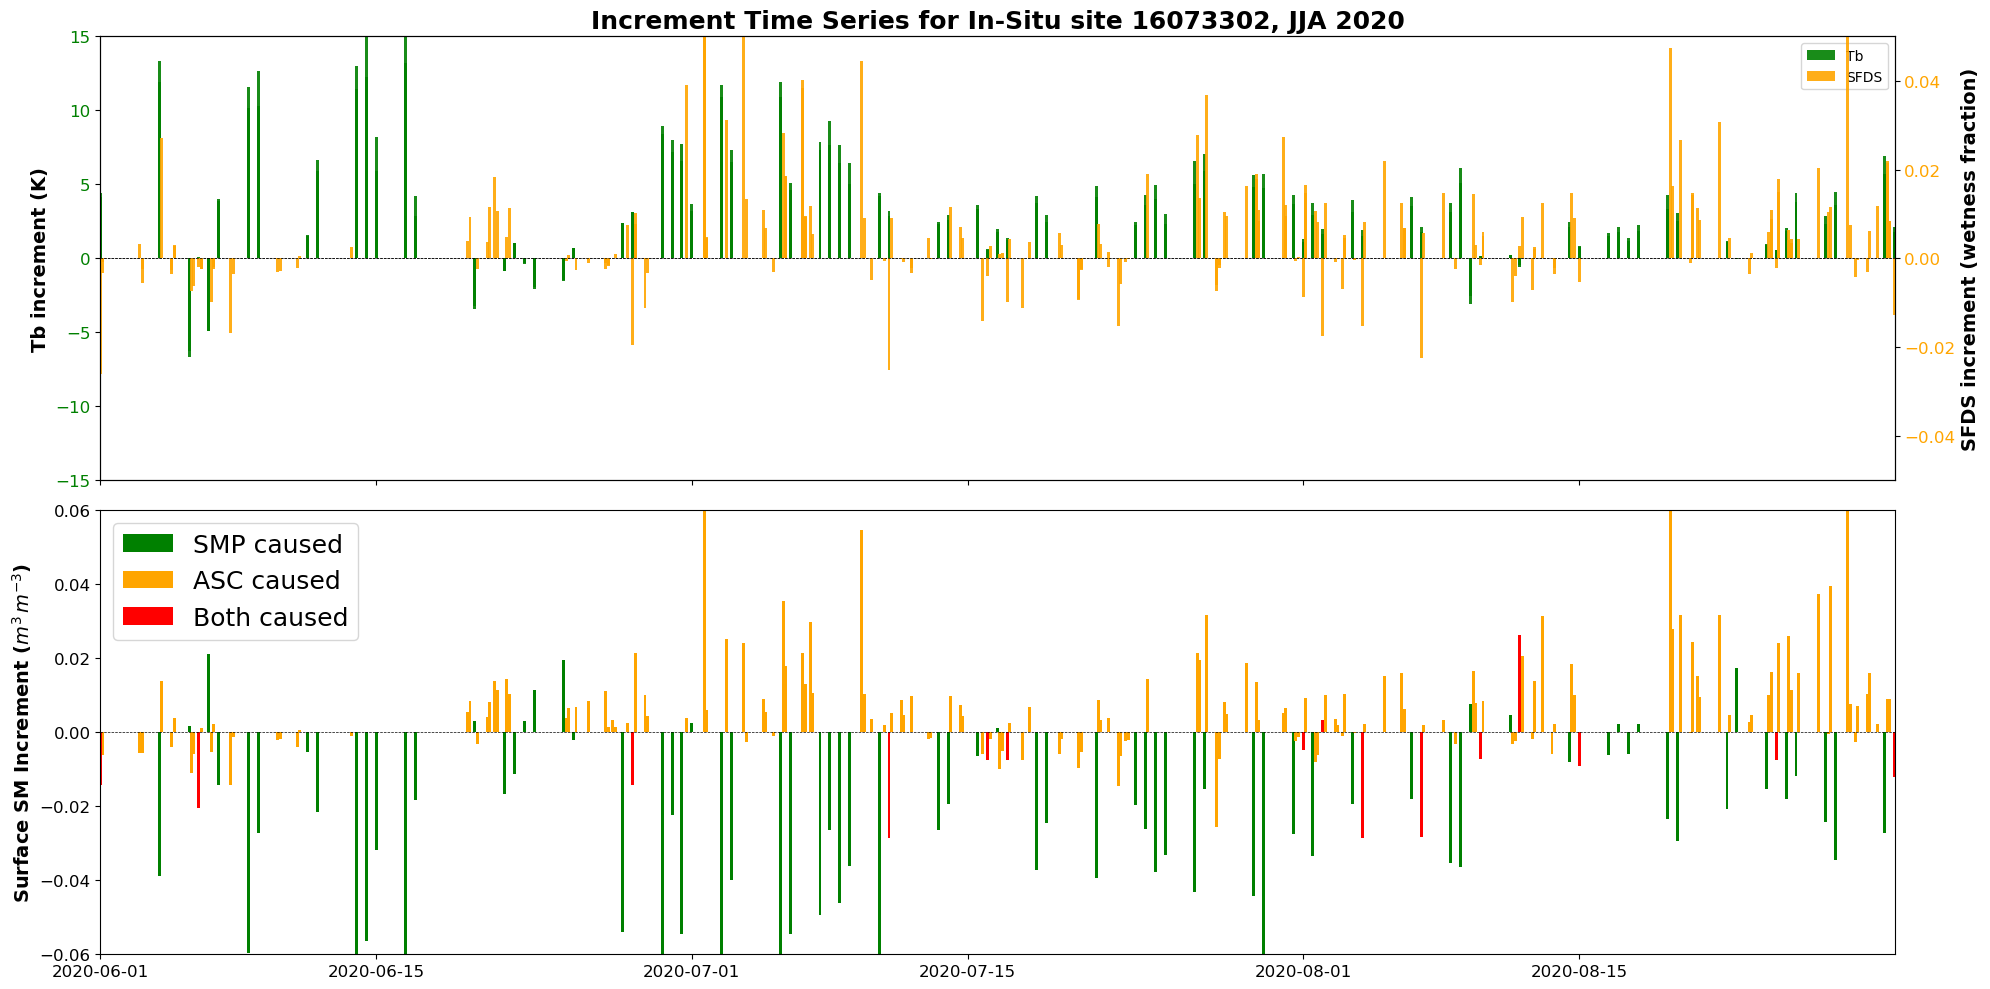

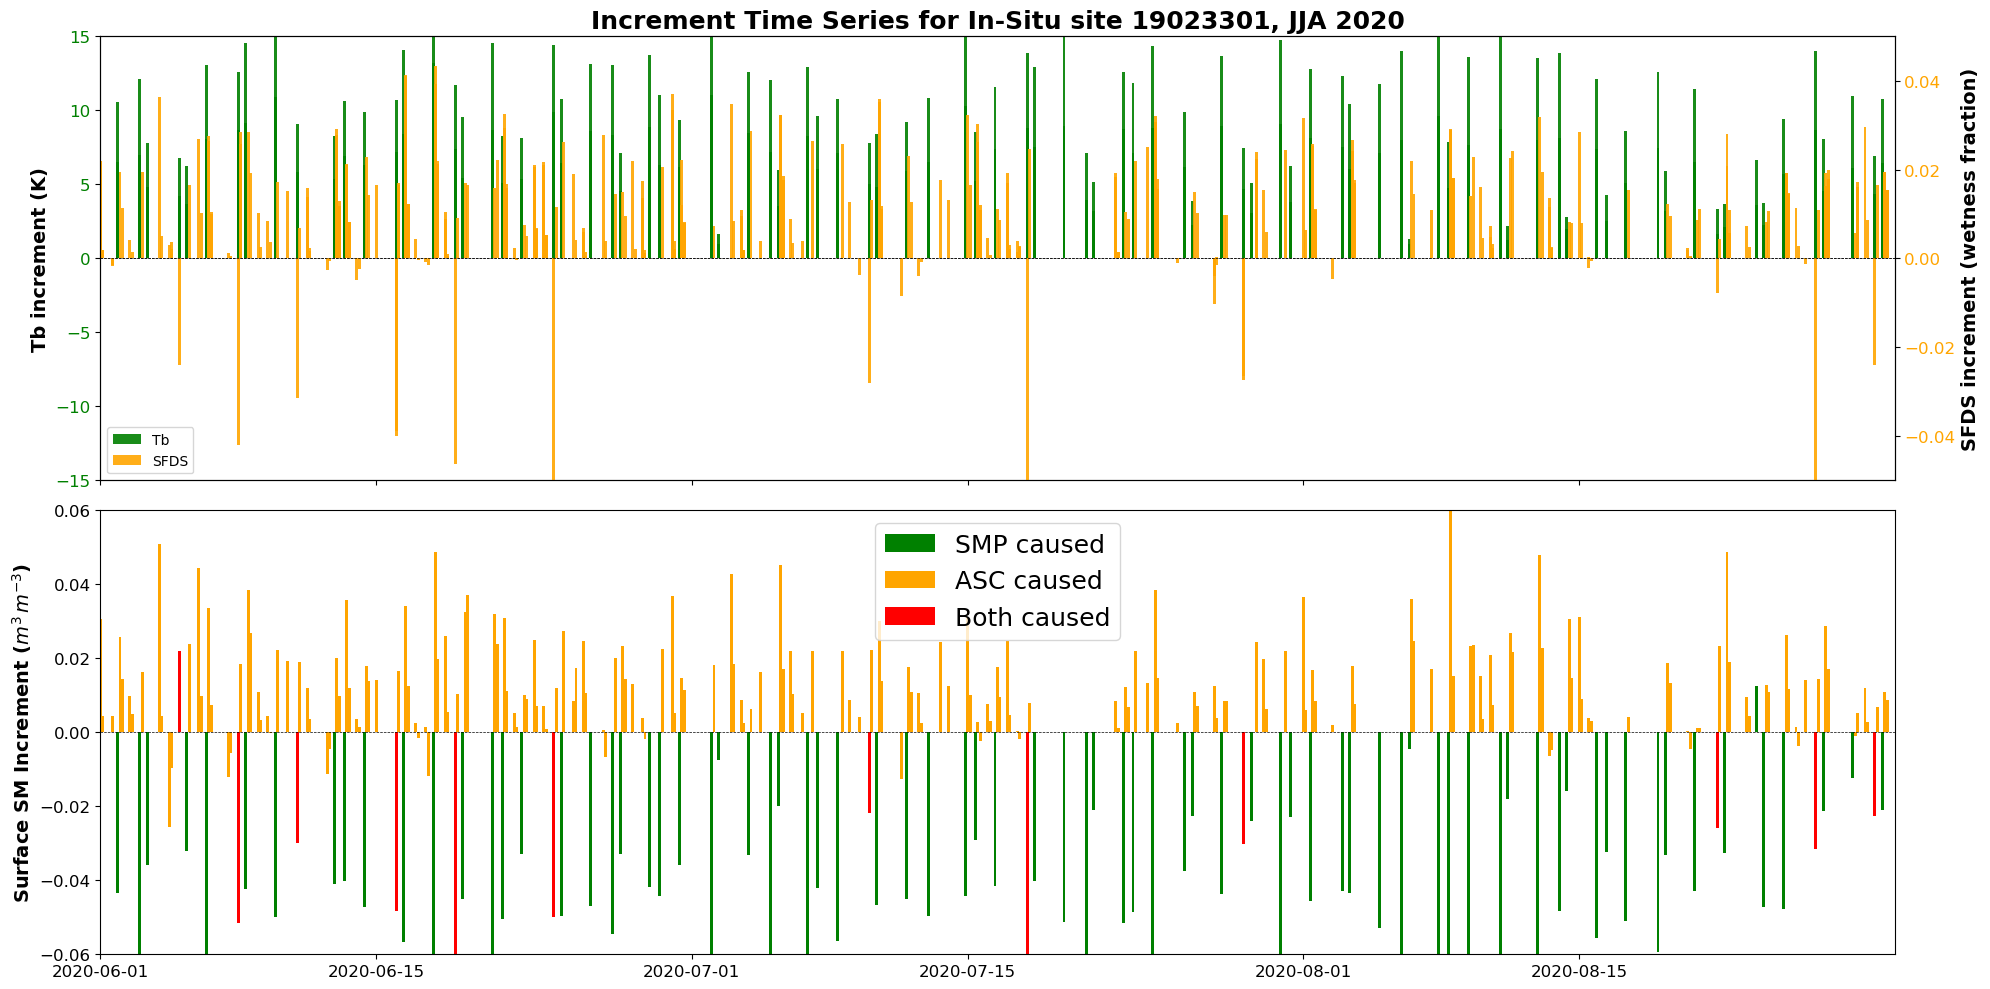

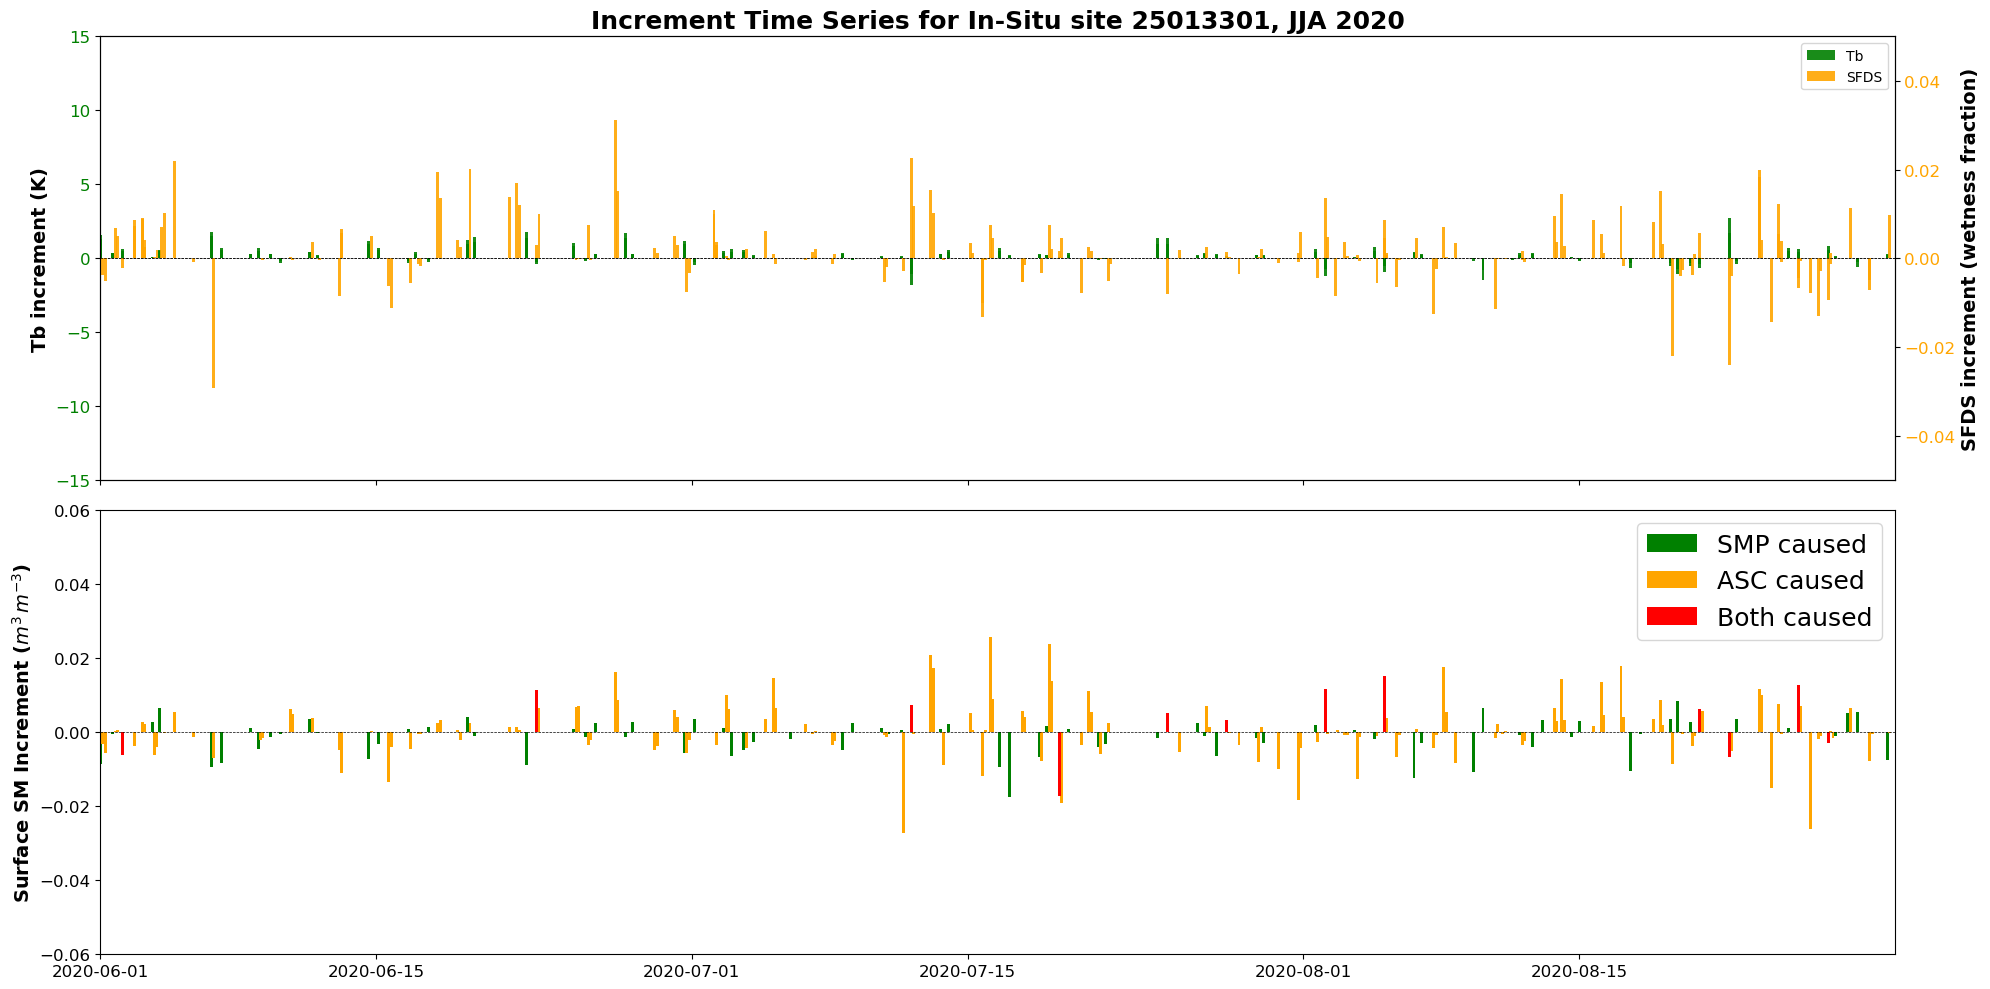

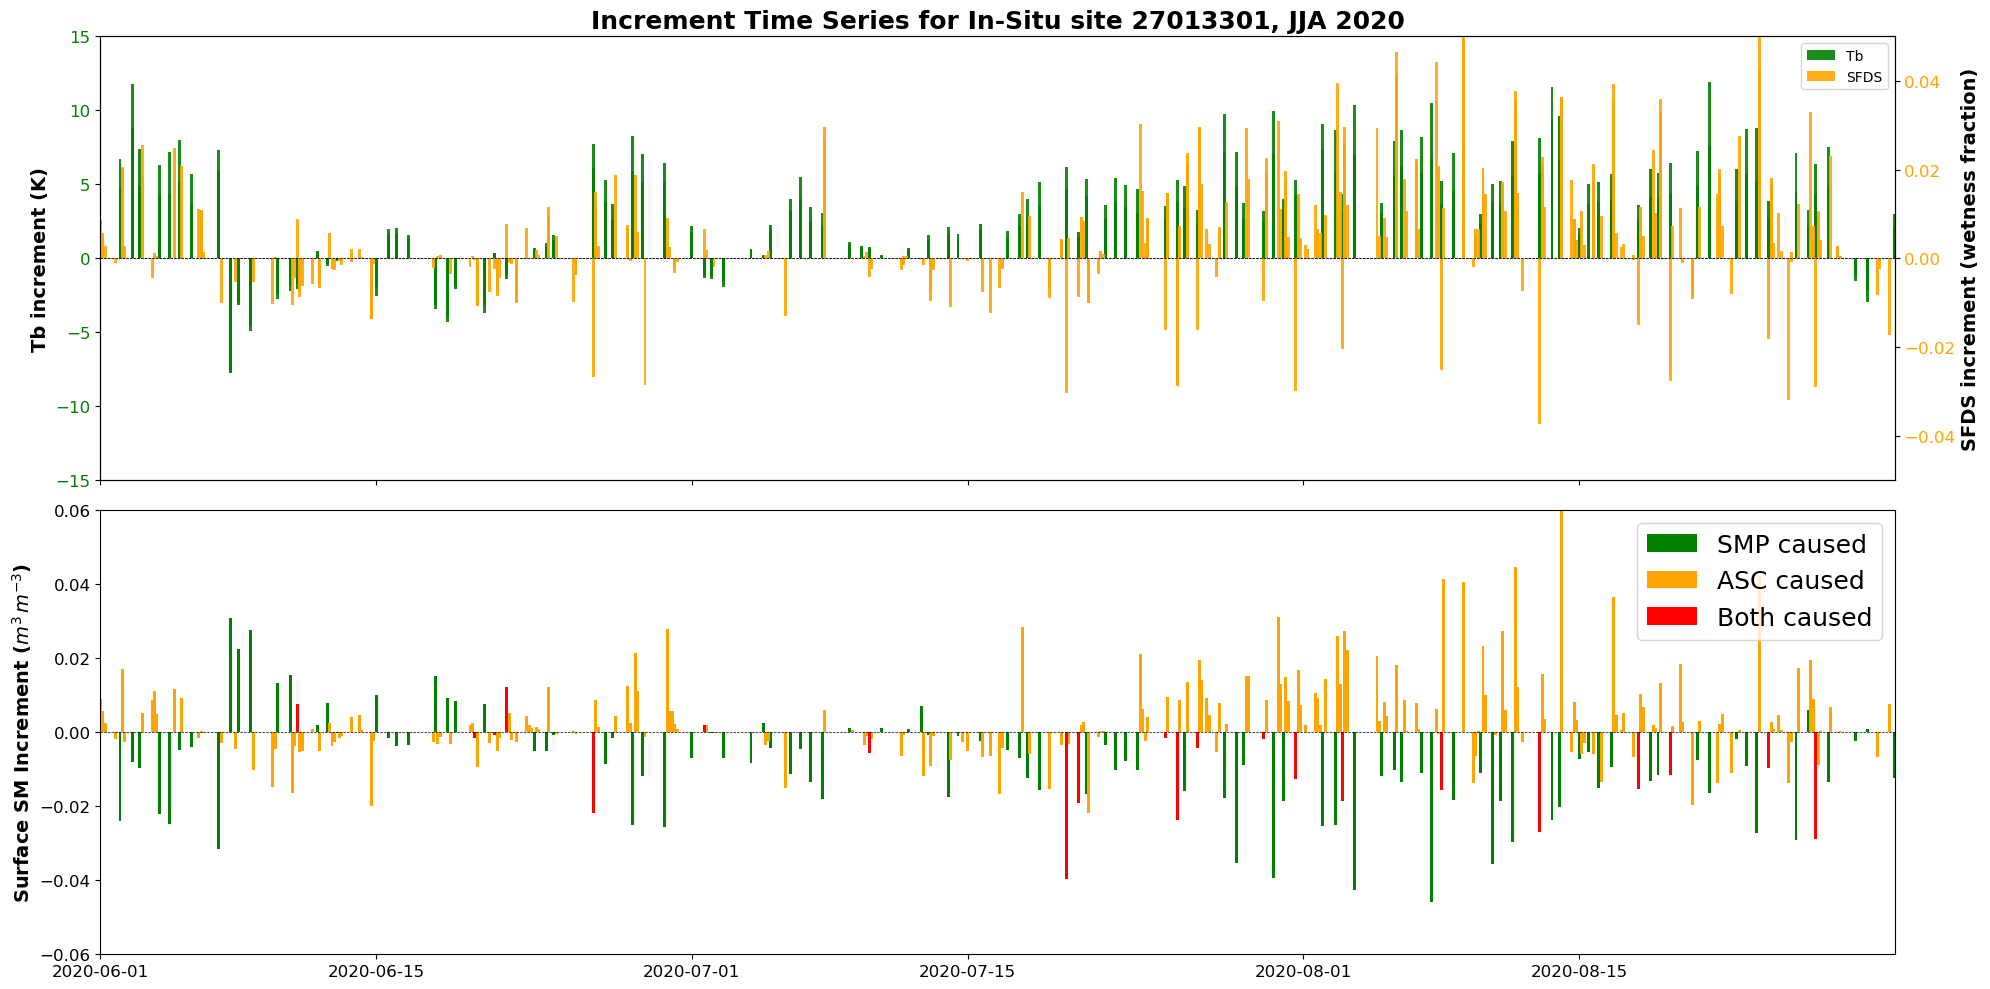

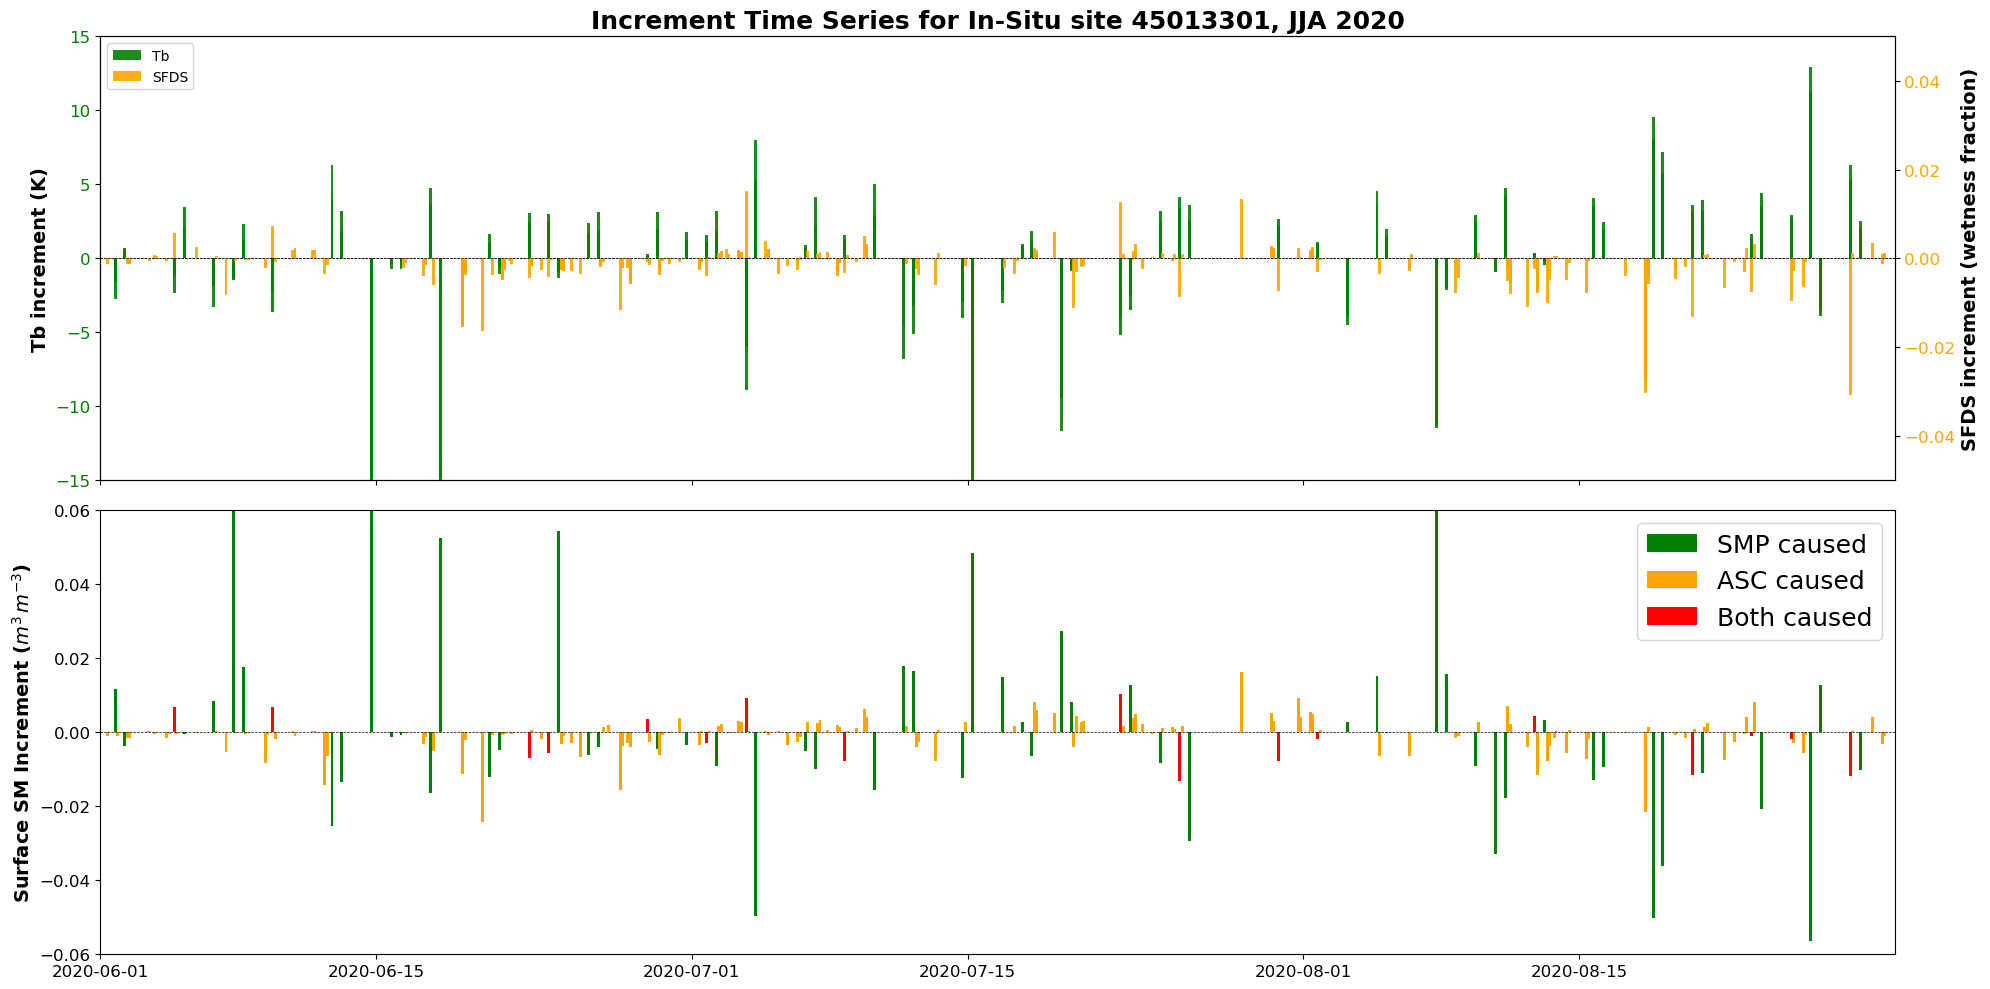

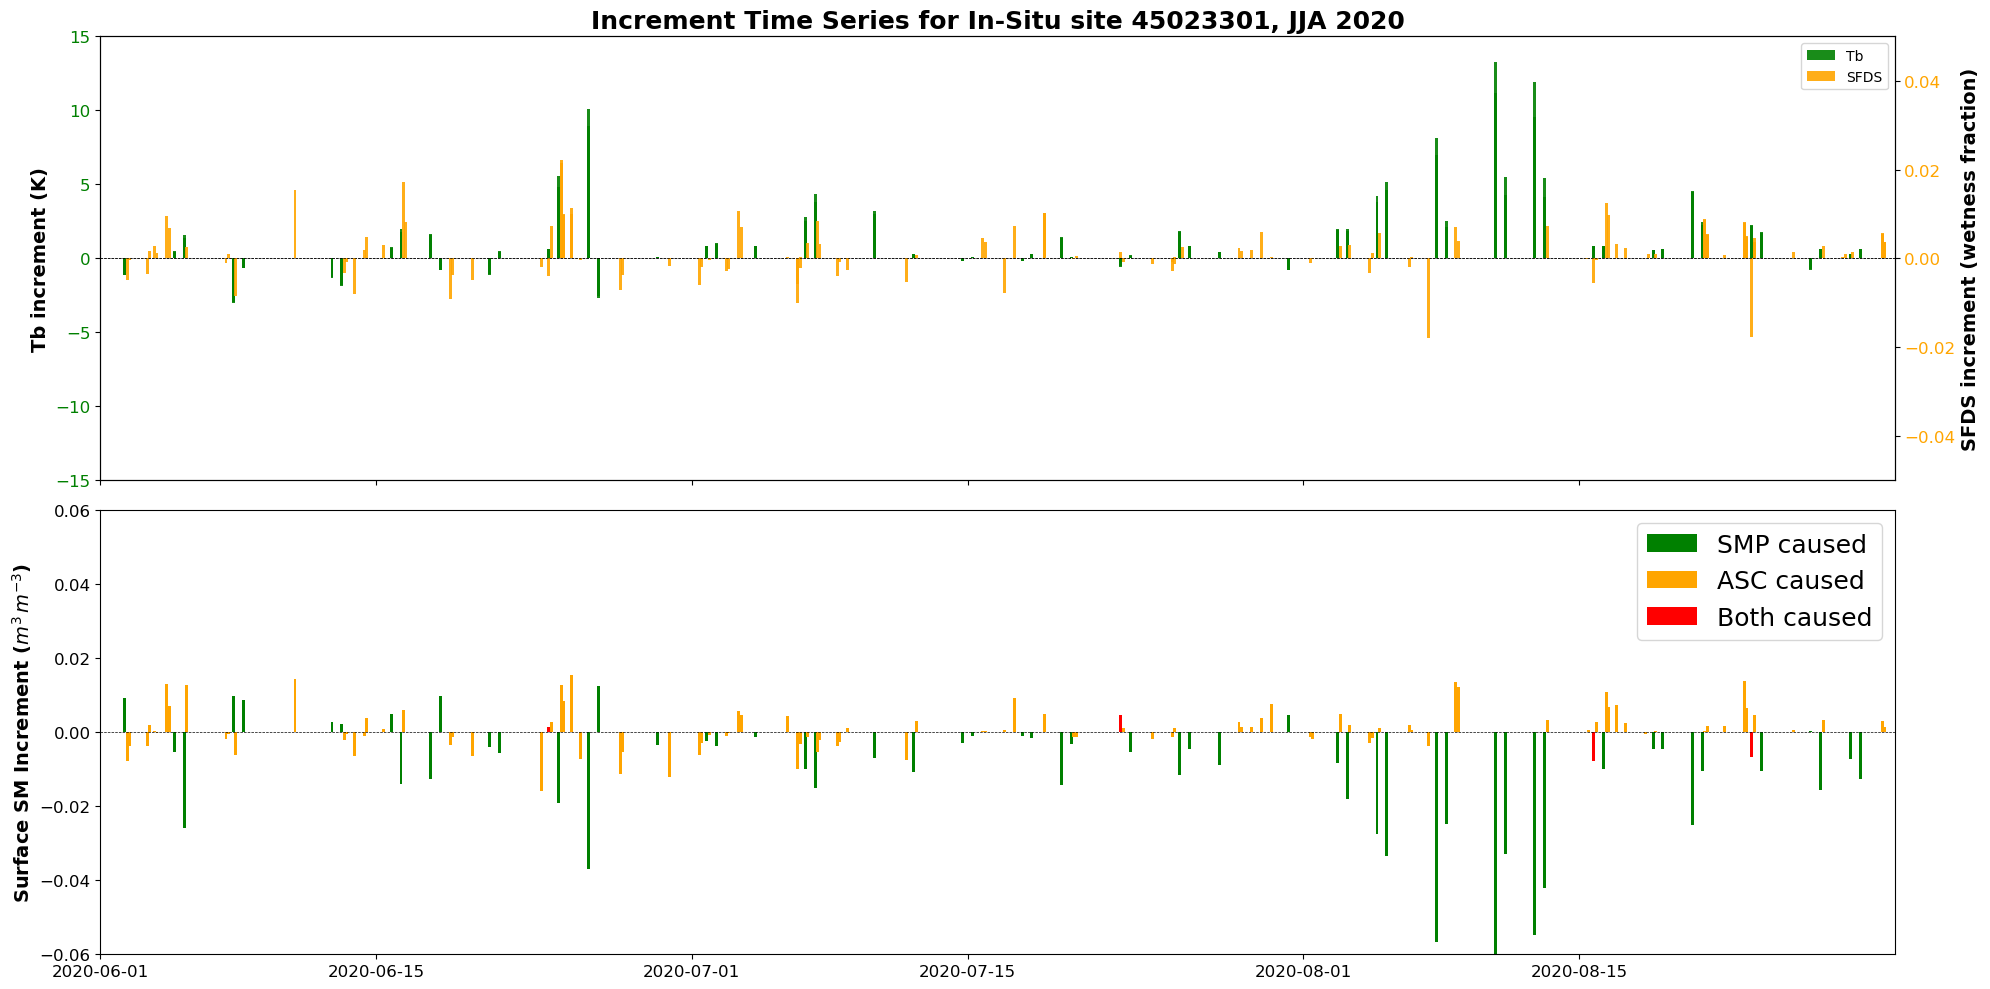

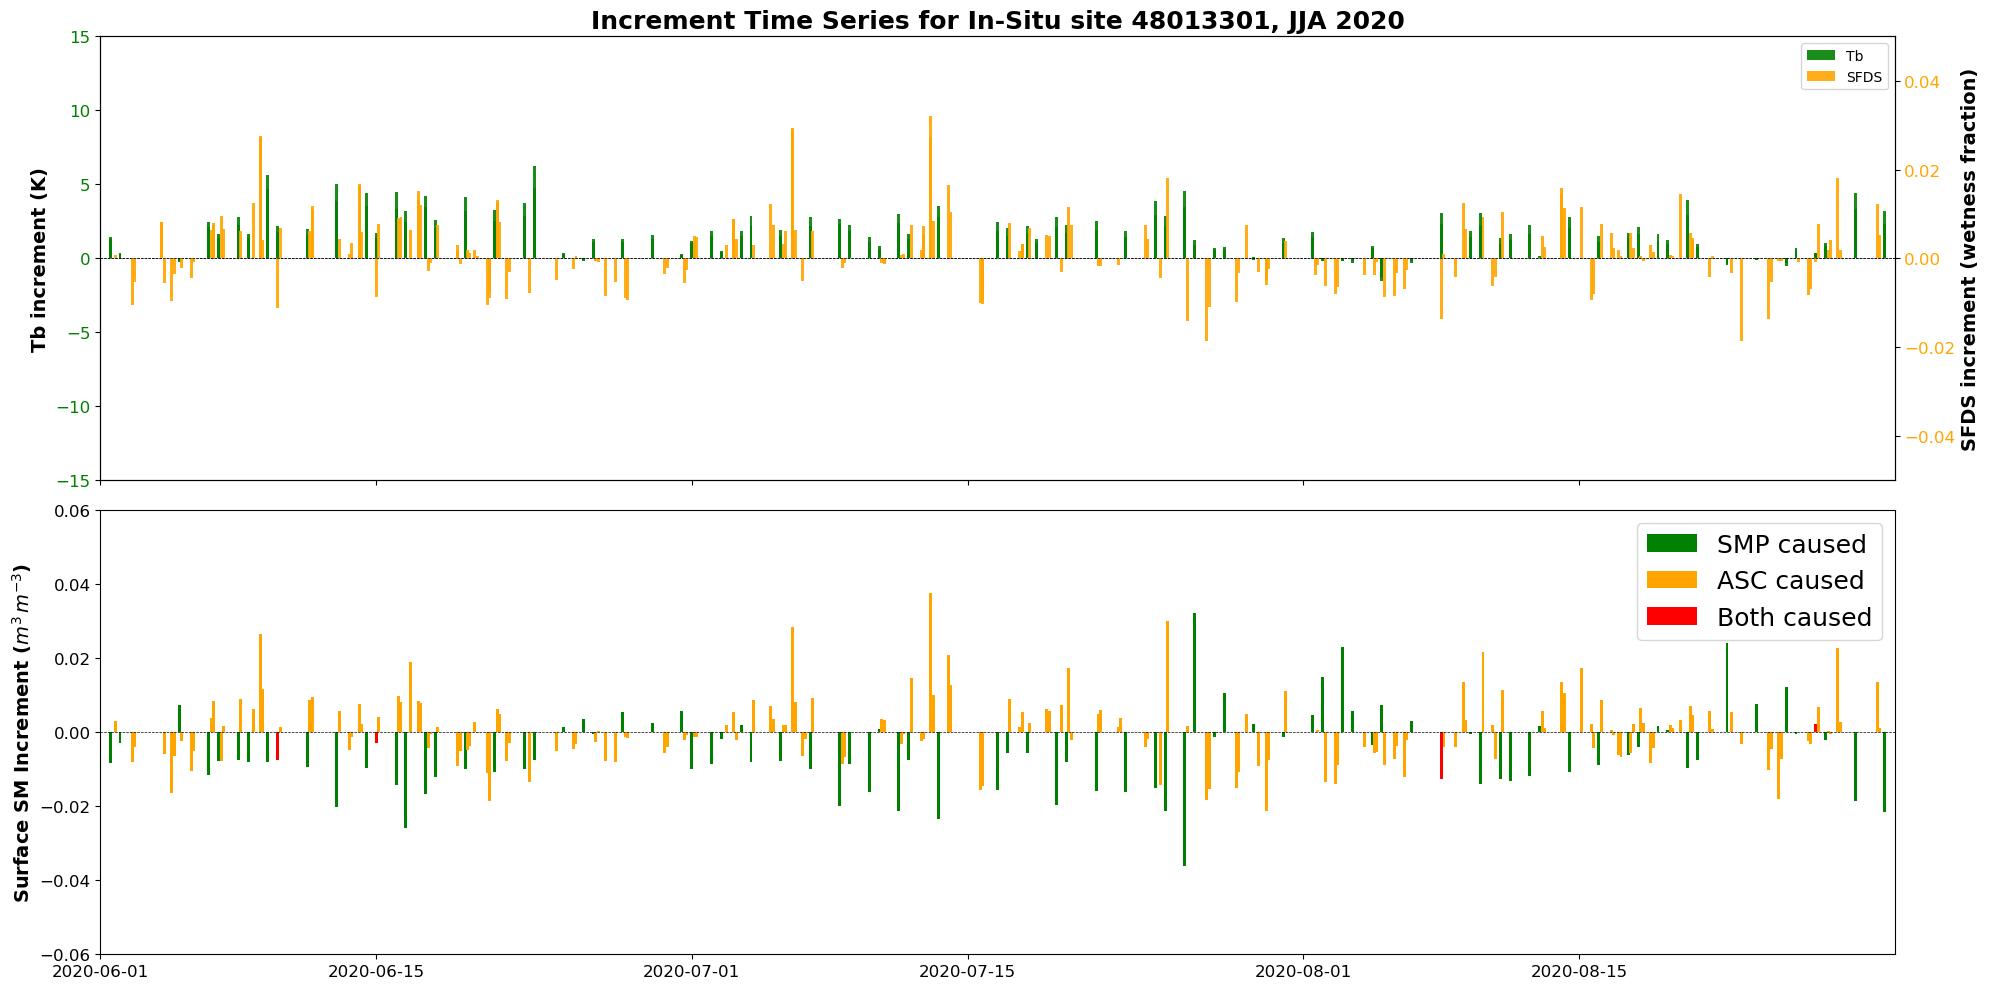

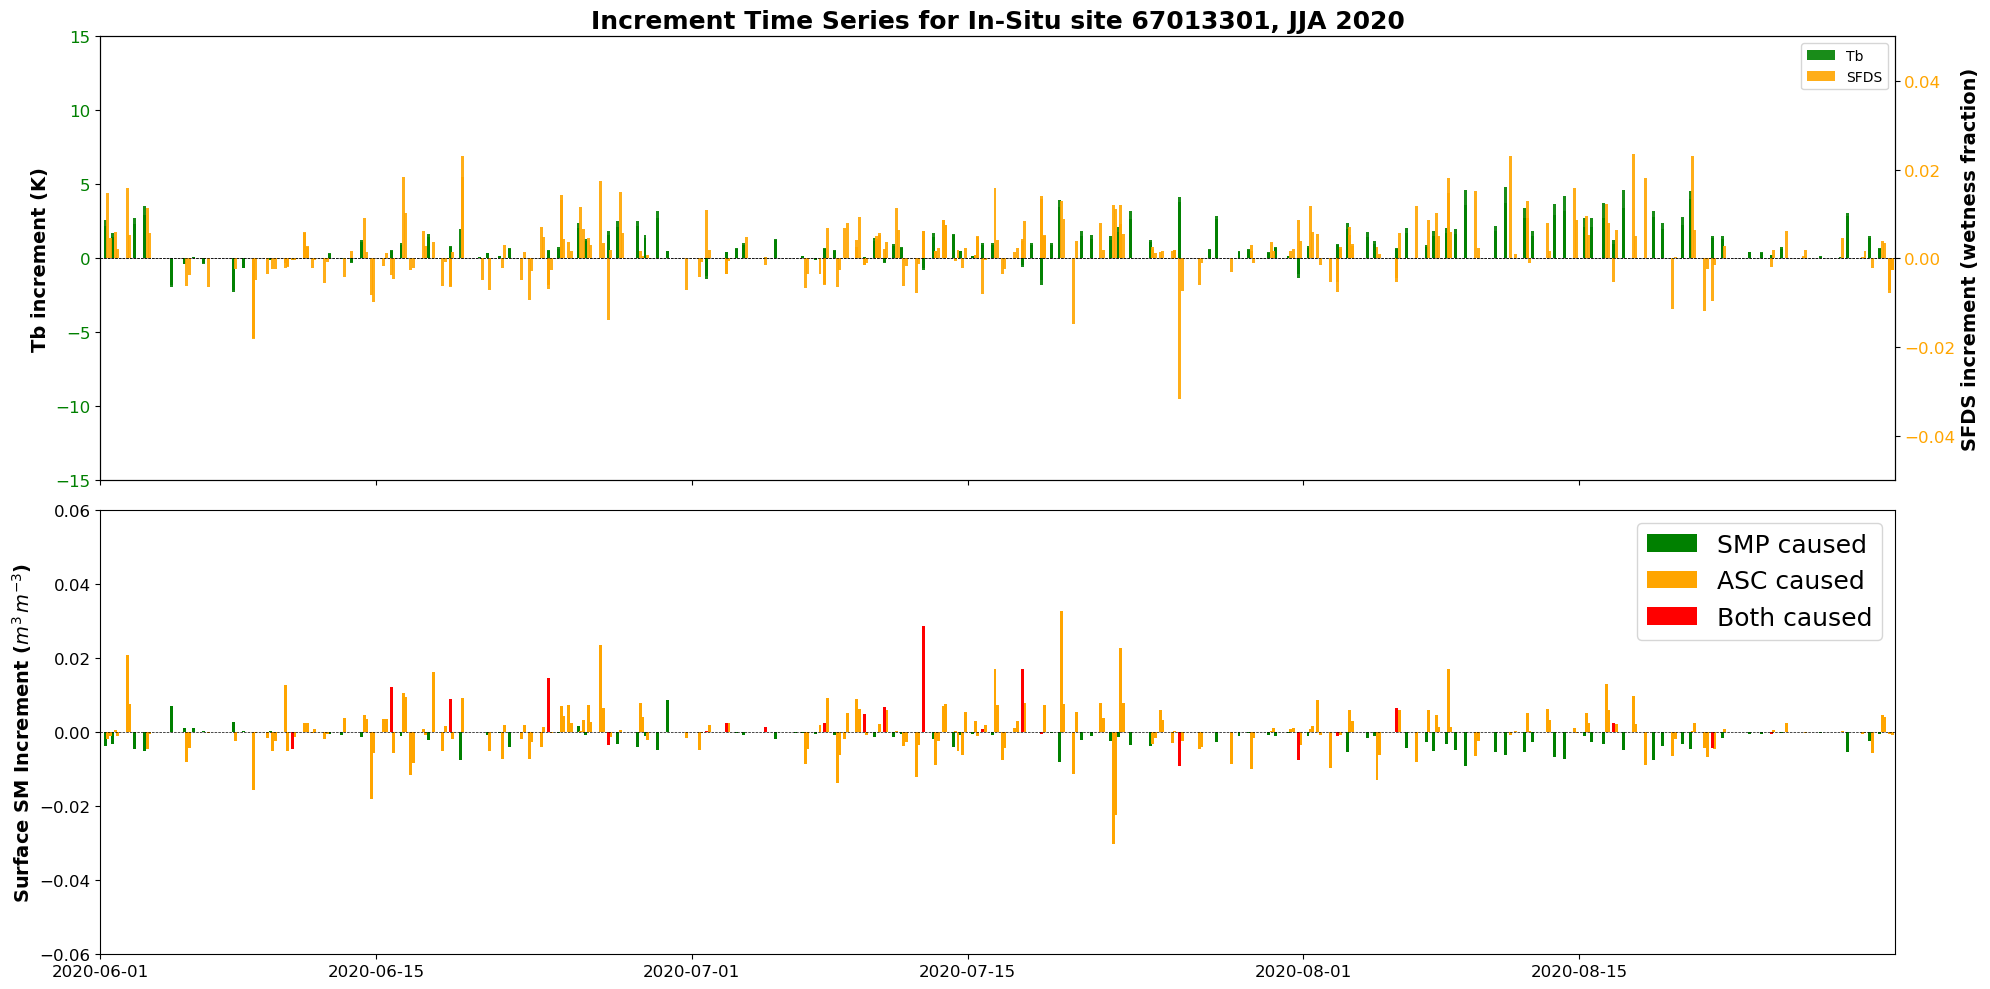

In [23]:
for ii in range(len(id_list)):

    tile_number = ind_tile[0][ii] #26258
    id_number = id_list[ii]

    i = np.where(unique_tilenum == tile_number)[0][0]

    time_stamp_s = date_time_grouped[i][obs_species_grouped[i] < 5]
    obs_inc_s = obs_inc_grouped[i][obs_species_grouped[i] < 5]

    new_time_stamp_s = []  # Create an empty list to store the datetime objects
    for j in range(len(time_stamp_s)):
        new_time_stamp_s.append(datetime(
            time_stamp_s[j]['year'][0],
            time_stamp_s[j]['month'][0],
            time_stamp_s[j]['day'][0],
            time_stamp_s[j]['hour'][0],
            time_stamp_s[j]['min'][0],
            time_stamp_s[j]['sec'][0]
        ))
    new_time_stamp_s = np.array(new_time_stamp_s)

    # sort the arrays by time
    sort_indices_s = np.argsort(new_time_stamp_s)
    new_time_stamp_s = new_time_stamp_s[sort_indices_s]
    obs_inc_s = obs_inc_s[sort_indices_s]

    time_stamp_a = date_time_grouped[i][obs_species_grouped[i] > 4]
    obs_inc_a = obs_inc_grouped[i][obs_species_grouped[i] > 4]

    new_time_stamp_a = []  # Create an empty list to store the datetime objects
    for j in range(len(time_stamp_a)):
        new_time_stamp_a.append(datetime(
            time_stamp_a[j]['year'][0],
            time_stamp_a[j]['month'][0],
            time_stamp_a[j]['day'][0],
            time_stamp_a[j]['hour'][0],
            time_stamp_a[j]['min'][0],
            time_stamp_a[j]['sec'][0]
        ))
    new_time_stamp_a = np.array(new_time_stamp_a)

    # sort the arrays by time
    sort_indices_a = np.argsort(new_time_stamp_a)
    new_time_stamp_a = new_time_stamp_a[sort_indices_a]
    obs_inc_a = obs_inc_a[sort_indices_a]

    indices_s = np.where(np.isin(date_time_i, new_time_stamp_s))[0].astype(int)
    indices_a = np.where(np.isin(date_time_i, new_time_stamp_a))[0].astype(int)
    indices_sa = np.intersect1d(np.where(np.isin(date_time_i, new_time_stamp_s))[0], np.where(np.isin(date_time_i, new_time_stamp_a))[0]).astype(int)

    # Extract the sfmc_increment values for the specified tilenum
    sfmc_increment_i = sfmc_increment[:, tile_number]


    bar_width = 0.15
    opacity = 0.9

    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10), sharex=True)

    # Plot obs_inc_s in the top subplot with two y-axes
    ax1.bar(new_time_stamp_s, obs_inc_s, bar_width, alpha=opacity, color='green', label='Tb')
    ax1.set_ylabel('Tb increment (K)', weight='bold', fontsize=14)
    ax1.tick_params(axis='y', labelcolor='green')

    ax1_2 = ax1.twinx()
    ax1_2.bar(new_time_stamp_a, obs_inc_a, bar_width, alpha=opacity, color='orange', label='SFDS')
    ax1_2.set_ylabel('SFDS increment (wetness fraction)', weight='bold', fontsize=14)
    ax1_2.tick_params(axis='y', labelcolor='orange')

    # Plot the sfmc_increment values in the bottom subplot
    # ax2.bar(date_time_i, sfmc_increment_i, bar_width, color='blue', alpha=0.2, label='all_sfmc_inc')
    ax2.bar(date_time_i[indices_s], sfmc_increment_i[indices_s], bar_width, color='green', label='SMP caused')
    ax2.bar(date_time_i[indices_a], sfmc_increment_i[indices_a], bar_width,  color='orange', label='ASC caused')
    ax2.bar(date_time_i[indices_sa], sfmc_increment_i[indices_sa], bar_width, color='red', label='Both caused')
    ax2.set_ylabel('Surface SM Increment ($m^3 \, m^{-3}$)', weight='bold', fontsize=14)

    ax1.yaxis.set_tick_params(labelsize=12)
    ax1_2.yaxis.set_tick_params(labelsize=12)
    ax2.yaxis.set_tick_params(labelsize=12)
    ax2.xaxis.set_tick_params(labelsize=12)

    # Add a black line at y=0 in both subplots
    ax1.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
    ax1_2.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
    ax2.axhline(y=0, color='black', linestyle='--', linewidth=0.5)

    # Set x-axis limits
    start_date = datetime(2020, 6, 1)
    end_date = datetime(2020, 8, 31)
    ax1.set_xlim(start_date, end_date)
    ax2.set_xlim(start_date, end_date)

    # Set y-axis limits for the top subplot
    ax1.set_ylim(-15, 15)
    ax1_2.set_ylim(-0.05, 0.05)
    ax2.set_ylim(-0.06, 0.06)

    # Display the legend
    # Get the handles and labels from ax1 and ax1_2
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax1_2.get_legend_handles_labels()

    # Combine the handles and labels
    handles = handles1 + handles2
    labels = labels1 + labels2

    # Display the combined legend
    ax1.legend(handles, labels)

    # 
    ax2.legend(fontsize=18)

    # Add title to the plot
    ax1.set_title('Increment Time Series for In-Situ site ' + str(id_number)+ ', JJA 2020', weight='bold', fontsize=18)

    fig.tight_layout()
    plt.show()

    # Save the figure
    # fig.savefig('increment_time_series_INSITU_id_'+str(id_number)+'_JJA_2020.png', dpi=400) #, bbox_inches='tight')

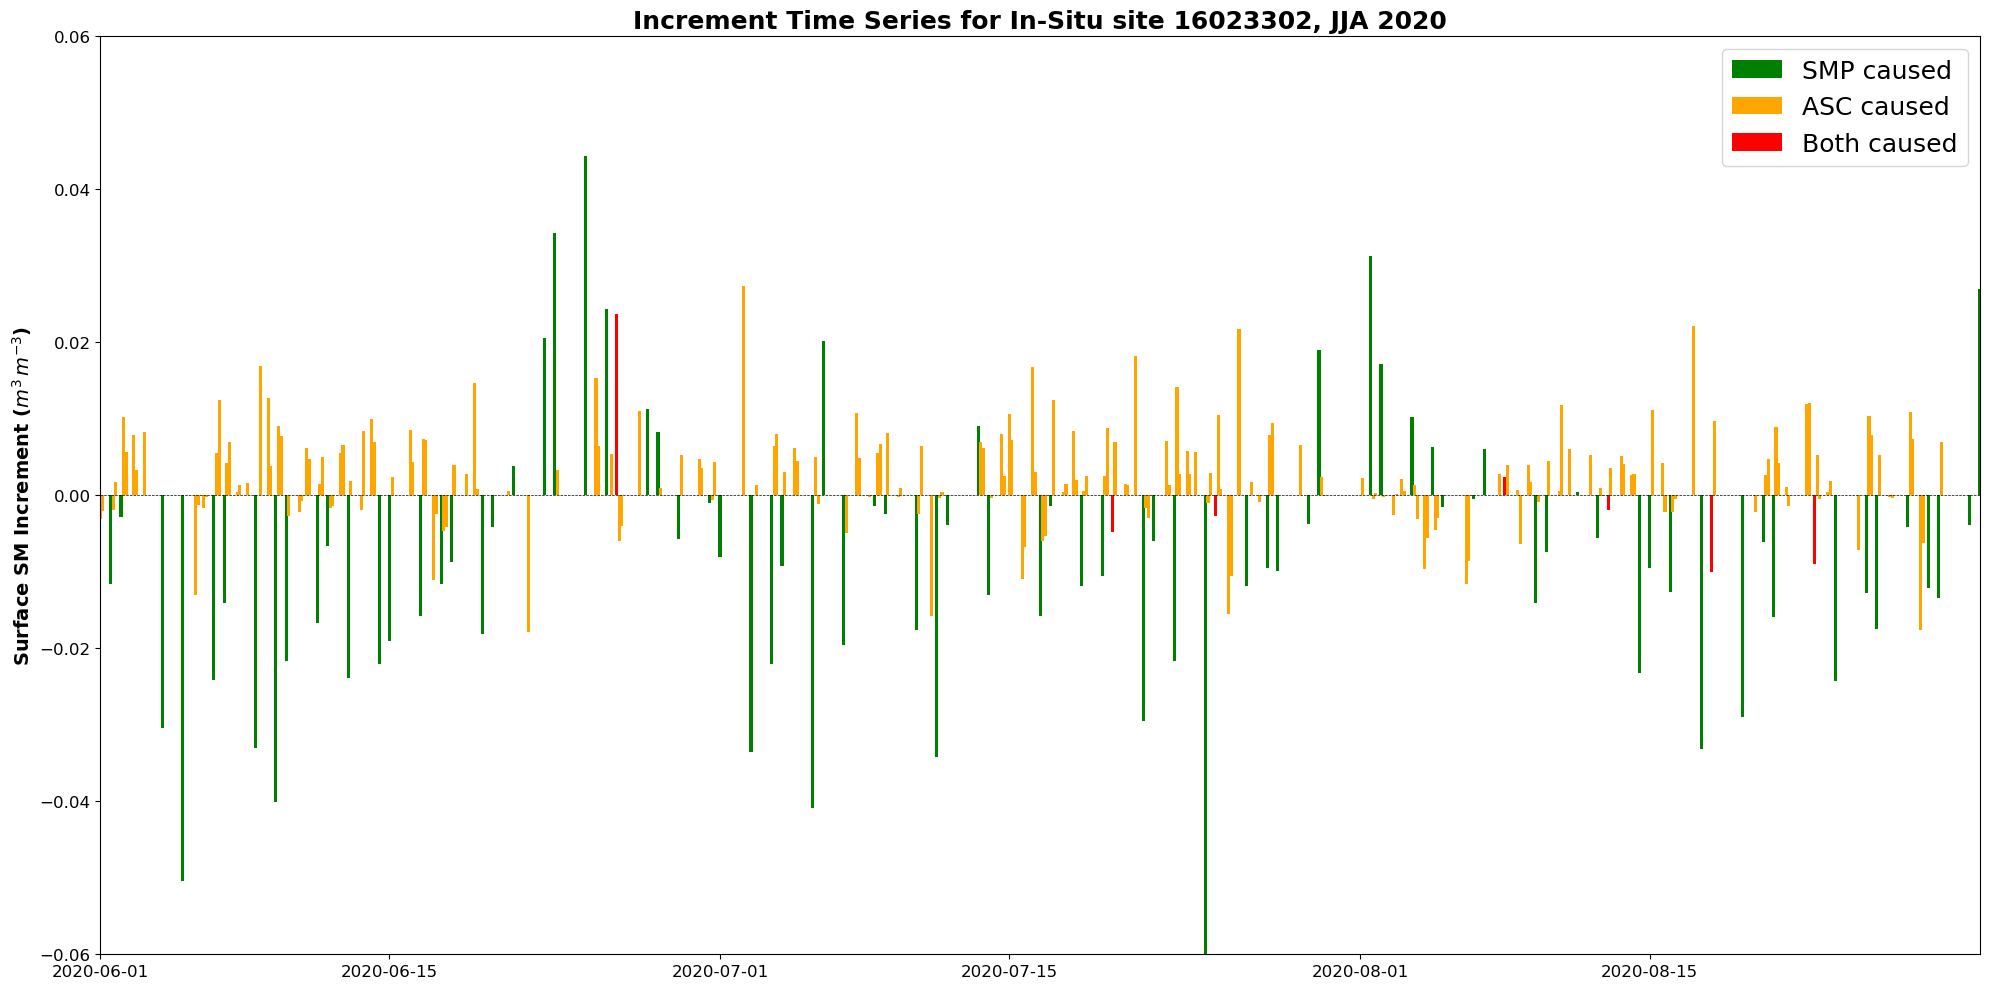

In [25]:
ii = 6

tile_number = ind_tile[0][ii] #26258
id_number = id_list[ii]

i = np.where(unique_tilenum == tile_number)[0][0]

time_stamp_s = date_time_grouped[i][obs_species_grouped[i] < 5]
obs_inc_s = obs_inc_grouped[i][obs_species_grouped[i] < 5]

new_time_stamp_s = []  # Create an empty list to store the datetime objects
for j in range(len(time_stamp_s)):
    new_time_stamp_s.append(datetime(
        time_stamp_s[j]['year'][0],
        time_stamp_s[j]['month'][0],
        time_stamp_s[j]['day'][0],
        time_stamp_s[j]['hour'][0],
        time_stamp_s[j]['min'][0],
        time_stamp_s[j]['sec'][0]
    ))
new_time_stamp_s = np.array(new_time_stamp_s)

# sort the arrays by time
sort_indices_s = np.argsort(new_time_stamp_s)
new_time_stamp_s = new_time_stamp_s[sort_indices_s]
obs_inc_s = obs_inc_s[sort_indices_s]

time_stamp_a = date_time_grouped[i][obs_species_grouped[i] > 4]
obs_inc_a = obs_inc_grouped[i][obs_species_grouped[i] > 4]

new_time_stamp_a = []  # Create an empty list to store the datetime objects
for j in range(len(time_stamp_a)):
    new_time_stamp_a.append(datetime(
        time_stamp_a[j]['year'][0],
        time_stamp_a[j]['month'][0],
        time_stamp_a[j]['day'][0],
        time_stamp_a[j]['hour'][0],
        time_stamp_a[j]['min'][0],
        time_stamp_a[j]['sec'][0]
    ))
new_time_stamp_a = np.array(new_time_stamp_a)

# sort the arrays by time
sort_indices_a = np.argsort(new_time_stamp_a)
new_time_stamp_a = new_time_stamp_a[sort_indices_a]
obs_inc_a = obs_inc_a[sort_indices_a]

indices_s = np.where(np.isin(date_time_i, new_time_stamp_s))[0].astype(int)
indices_a = np.where(np.isin(date_time_i, new_time_stamp_a))[0].astype(int)
indices_sa = np.intersect1d(np.where(np.isin(date_time_i, new_time_stamp_s))[0], np.where(np.isin(date_time_i, new_time_stamp_a))[0]).astype(int)

# Extract the sfmc_increment values for the specified tilenum
sfmc_increment_i = sfmc_increment[:, tile_number]


bar_width = 0.15
opacity = 0.9


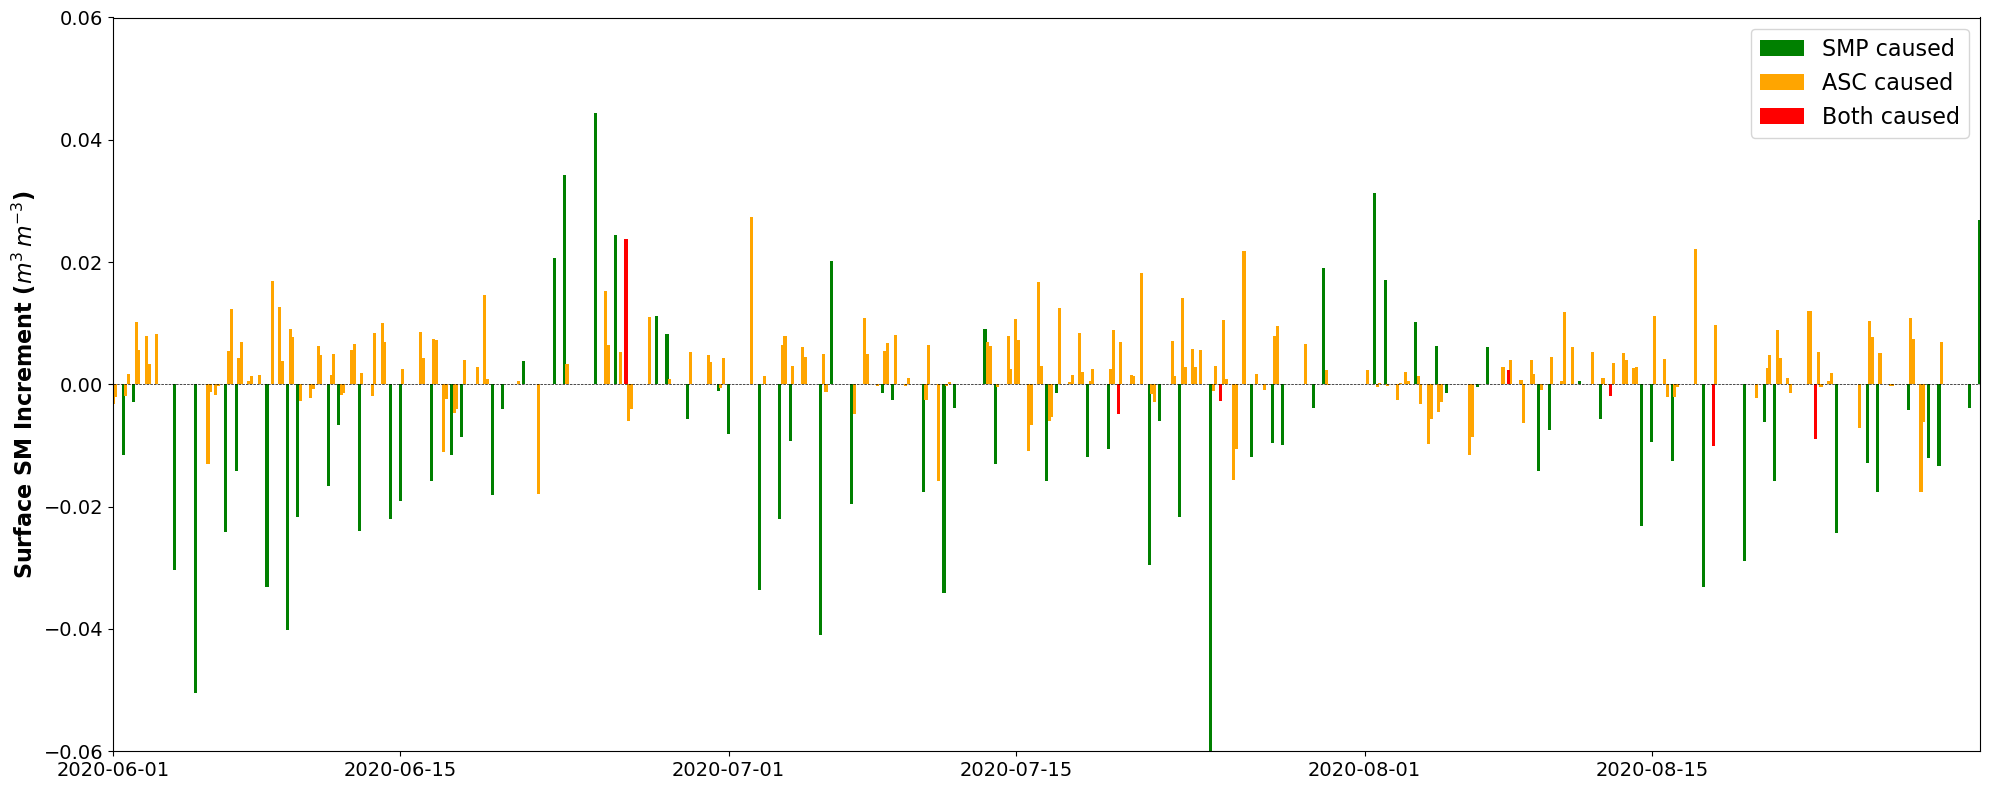

In [28]:

fig, (ax2) = plt.subplots(figsize=(20, 8))


# Plot the sfmc_increment values in the bottom subplot
# ax2.bar(date_time_i, sfmc_increment_i, bar_width, color='blue', alpha=0.2, label='all_sfmc_inc')
ax2.bar(date_time_i[indices_s], sfmc_increment_i[indices_s], bar_width, color='green', label='SMP caused')
ax2.bar(date_time_i[indices_a], sfmc_increment_i[indices_a], bar_width,  color='orange', label='ASC caused')
ax2.bar(date_time_i[indices_sa], sfmc_increment_i[indices_sa], bar_width, color='red', label='Both caused')
ax2.set_ylabel('Surface SM Increment ($m^3 \, m^{-3}$)', weight='bold', fontsize=16)

ax2.yaxis.set_tick_params(labelsize=14)
ax2.xaxis.set_tick_params(labelsize=14)

# Add a black line at y=0 in both subplots
ax2.axhline(y=0, color='black', linestyle='--', linewidth=0.5)

# Set x-axis limits
start_date = datetime(2020, 6, 1)
end_date = datetime(2020, 8, 31)
ax2.set_xlim(start_date, end_date)

# Set y-axis limits for the top subplot
ax2.set_ylim(-0.06, 0.06)

# 
ax2.legend(fontsize=16)

# Add title to the plot
# ax2.set_title('Increment Time Series for In-Situ site ' + str(id_number)+ ', JJA 2020', weight='bold', fontsize=18)

fig.tight_layout()
plt.show()

# Save the figure
fig.savefig('sm_increment_time_series_INSITU_id_'+str(id_number)+'_JJA_2020.png', dpi=400, bbox_inches='tight')